# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

#### Шаг 1. Загрузка данных

Загрузим библиотеки:

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import missingno as msno

Загрузим данные из csv-файла games.csv в датафрейм c помощью библиотеки pandas.

Выведем первые 10 строк. Изучим общую информацию о полученном датафрейме:

In [6]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


```в датафрейме 16 715 строк и 11 столбцов, из них в 6 столбцах есть пропуски.```

#### Шаг 2. Предобработка данных

***Заменим названия столбцов (приведём к нижнему регистру)***

In [7]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

***Обработаем пропуски***

Определим, в каких столбцах есть пропуски:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Доля пропусков:

In [9]:
pd.DataFrame(round(data.isna().mean()*100,2)) 

,0
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


Визуализируем пропущенные значения:

<AxesSubplot:>

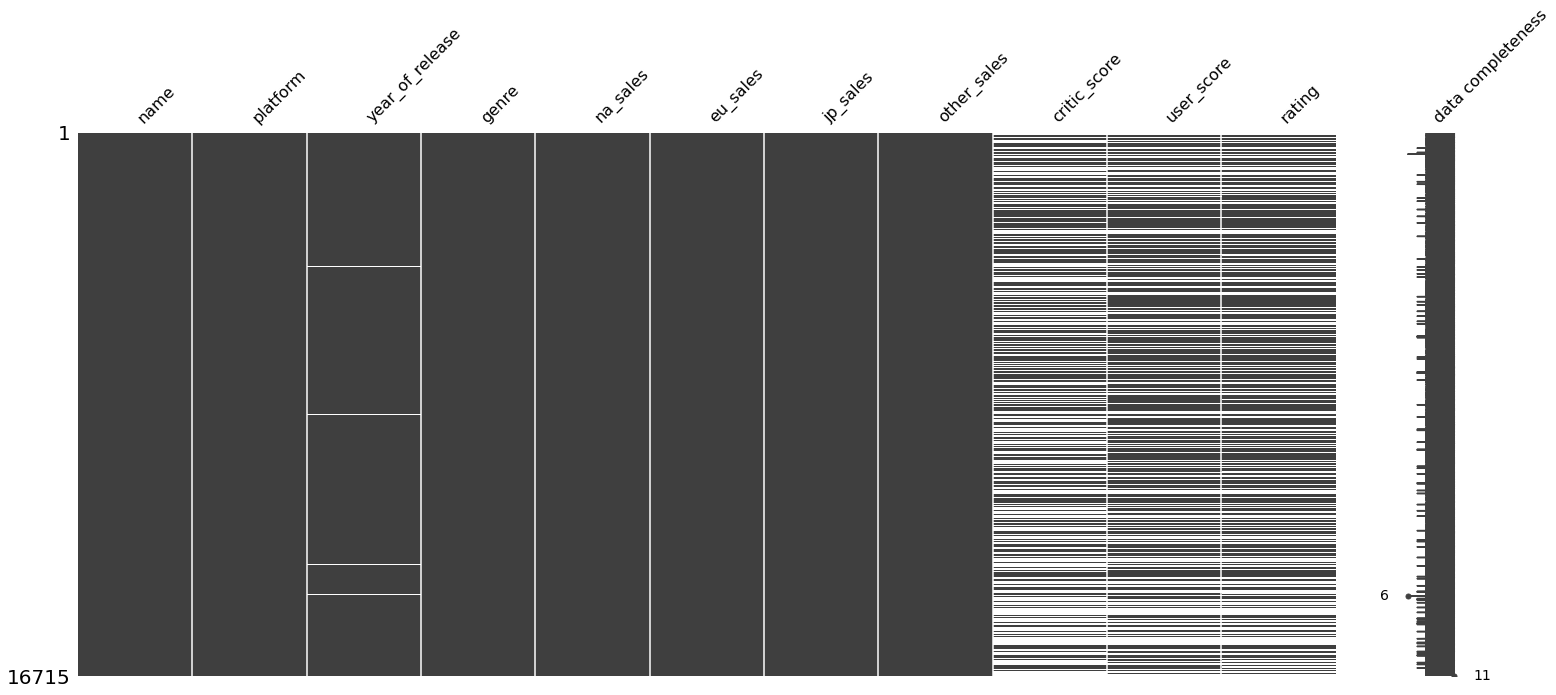

In [10]:
msno.matrix(data, labels=True)

<AxesSubplot:>

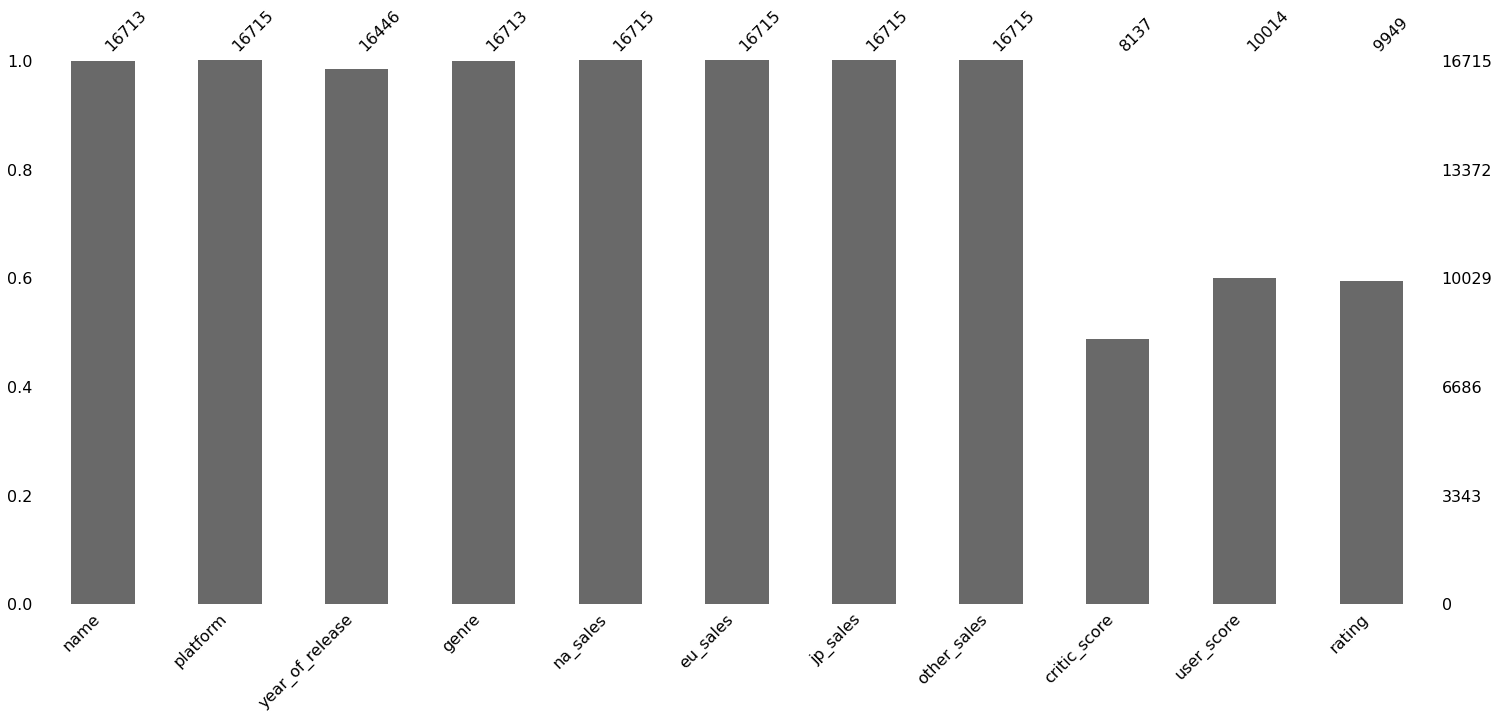

In [11]:
msno.bar(data)

11 столбцов, из них в 6 столбцах есть пропуски (name,year_of_release,genre,critic_score,user_score,user_score,rating)

Удаляем строки с пустыми значениями  в столбцах  ```year_of_release```,```genre``` и ```name``` их небольшое количество.  заполнить нечем. Проверим изменение - количество строк.

In [12]:
data =data.dropna(subset=['name','year_of_release','genre']) 
data.shape[0]

16444

Посмотрим корреляцию.

In [13]:
data_corr = data.corr() 
data_corr.style.background_gradient(cmap='coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411
na_sales,-0.092326,1.000000,0.766546,0.451162,0.638479,0.240083
eu_sales,0.004045,0.766546,1.000000,0.435894,0.722679,0.221276
jp_sales,-0.168477,0.451162,0.435894,1.000000,0.291562,0.153474
other_sales,0.037821,0.638479,0.722679,0.291562,1.000000,0.198410
critic_score,0.011411,0.240083,0.221276,0.153474,0.198410,1.000000


сильной связи столбца critic_score с другими столбцами нет.
По остальным столбцам с пропусками user_score и rating также нельзя определить сильную взаимосвязь с другими столбцами. Удалять или заменять на медиану или среднее нецелесообразно.
Оставляем.

Причины, которые могли привести к пропускам в данных: 

1) Человеческий фактор -пользователи могли не внести нужные данные; 

2) Фактическое отстутствие этих данных ;

3) Тех. сбой при внесении данных в таблицу. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц;

4) Несоответствие типов при внесении новых данных.

***Преобразуем данные в нужные типы***

Посмотрим на уникальные значения столбца user_score

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

с учетом того, что имеется значение tbd , а тип данных object , то нужно перевести на тип float64 b заменить некорректные значения на nan.

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')
display(data['user_score'].unique())
data['user_score'].dtypes

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

dtype('float64')

заменим year_of_release на int

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['year_of_release'].dtypes

dtype('int32')

***Проверим на наличие дубликатов***

***явные дубликаты:***

In [17]:
data.duplicated().sum()

0

явных дубликатов нет

***неявные дубликаты:***

Найдем игры , у которых полностью совпадают год, название и платформа.

In [18]:
display(data[data[['name', 'platform','year_of_release']].duplicated()])
data[['name', 'platform','year_of_release']].duplicated().sum()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


1

Найден 1 такой дубликат. Удалим его.

In [19]:
index = data[data[['name', 'platform','year_of_release']].duplicated()].index
data.drop(index, inplace=True)
data[['name', 'platform','year_of_release']].duplicated().sum()

0

***Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:***

In [20]:
data['total_sales'] = data[['na_sales']+['eu_sales']+['jp_sales']+['other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Данные после предобработки:

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


**Итог Предобработки данных**

В результате предобработки данных удалось :

1. Привести  к нижнему регистру названия столбцов.

2. Обработать пропуски , удалив строки с пропусками в столбцах name,year_of_release,genre.
Проанализировав оставшиеся столбцы с пропусками critic_score,user_score,user_score,rating, сделан вывод о невозможности их замени и нецелесообразности удаления. Оставили как есть.

3. Заменили тип данных user_score с object на float64 (заменив все некорретные значения на nan), а также заменили тип year_of_release с float64 на int32.

4. Проверили на явные дубликаты. Таких нет. Проверили на неявные дубликаты - одинаковое название, год и платформа. Нашелся 1 дубликат. Удалили.

5. Создали новый столбец для дальнейшей работы total_sales - суммарные продажи во всех регионах.

Количество строк уменьшилось с 16 715 до 16 443.


#### Шаг 3. Исследовательский анализ данных

***Посмотрим, сколько игр выпускалось в разные годы***

In [22]:
data.groupby('year_of_release')['name'].nunique()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64

<AxesSubplot:>

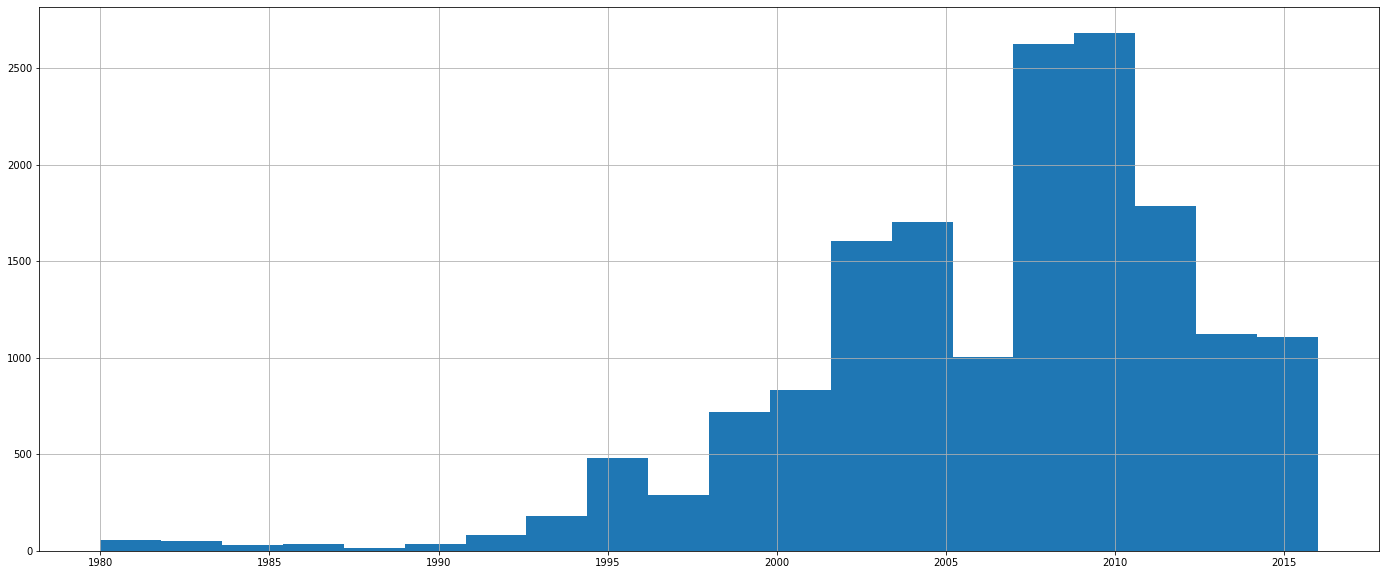

In [23]:
data['year_of_release'].hist(bins = 20, grid=True, figsize=(24, 10))

Важны ли данные за все периоды? - нет,с 1980 до 1993 выпускалось гораздо меньше новых игр, чем в последующие годы. 

C 1994 года шёл постепенный рост. Максимальные значения в 2008-2009 годах. Затем наблюдается снижение.

***Посмотрим, как менялись продажи по платформам***

Выберем платформы с наибольшими суммарными продажами

In [24]:
data.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Наибольшие суммарные продажи у PS2(1233.56), X360(961.24), PS3(931.33), Wii(891.18), DS(802.78), PS(727.58)

Построим распределение по годам

Text(0.5, 1.0, 'распределение по годам')

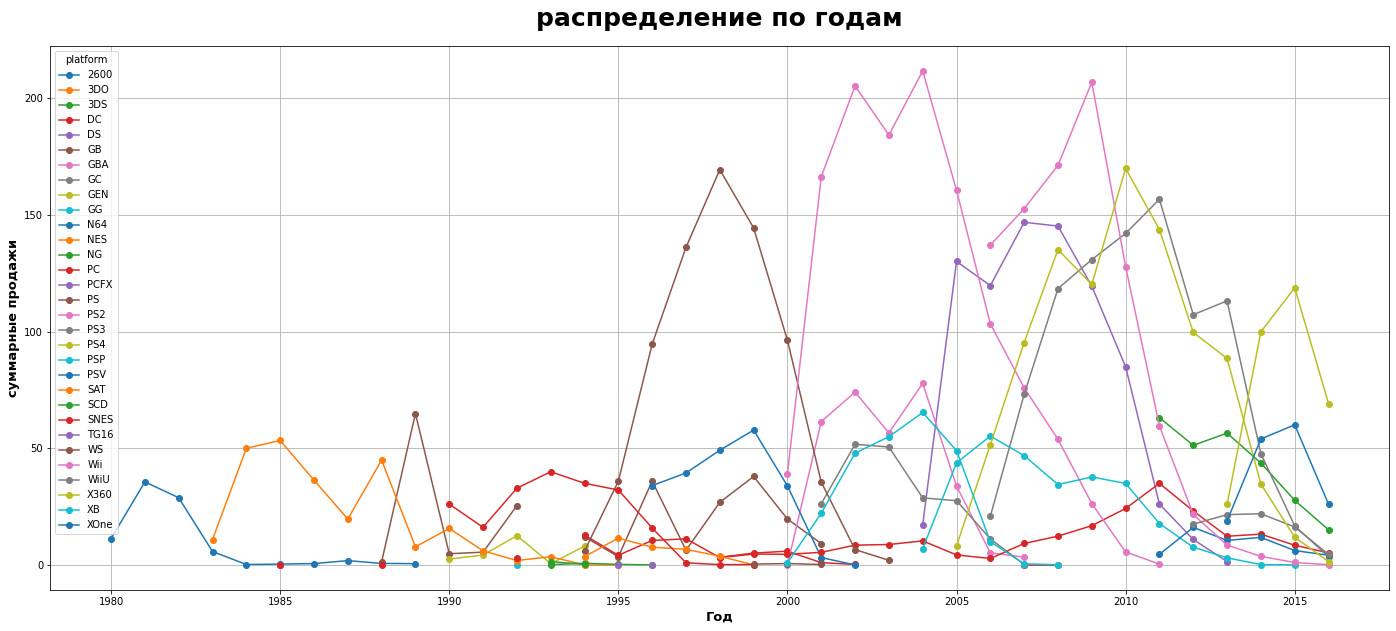

In [25]:
data.pivot_table(index='year_of_release',columns ='platform', values = 'total_sales', aggfunc='sum').plot( grid= True, figsize=(24,10),style ='o-')
plt.xlabel("Год", fontsize=13,
              fontweight='bold')
plt.ylabel("суммарные продажи", fontsize=13,
              fontweight='bold')
plt.title('распределение по годам',fontsize=25,
              fontweight='bold', pad=20)

Средняя продолжительность платформ year_of_release    7.612903
dtype: float64


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

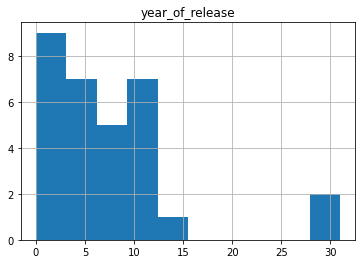

In [26]:
data2 = data.pivot_table(index='platform', values = 'year_of_release', aggfunc=['max','min'])
print('Средняя продолжительность платформ', (data2['max']-data2['min']).mean())

(data2['max']-data2['min']).hist(bins=10)

 За какой характерный срок появляются новые и исчезают старые платформы? 
 Средняя продолжительность платформ  7.6 лет.
 По гистограмме видно, что обычно до 12 лет.

***Возьмём данные за соответствующий актуальный период. Актуальный период определим с 2013 по 2015*** (с момента спада в 2009 имеет относительно стабильные показатели по выпуску новых игр). Не учитываем в работе данные за предыдущие годы.

In [27]:
data = data.query('2013<=year_of_release<=2015')

***Выясним какие платформы лидируют по продажам, растут или падают.***

In [28]:
data.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)

platform
PS4     244.89
PS3     177.83
X360    135.28
XOne    133.17
3DS     128.11
WiiU     60.03
PC       34.18
PSV      28.74
Wii      13.48
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [29]:
data.pivot_table(index='platform',columns ='year_of_release', values = 'total_sales', aggfunc='sum')

year_of_release,2013,2014,2015
platform,,,
3DS,56.57,43.76,27.78
DS,1.54,NaN,NaN
PC,12.38,13.28,8.52
PS3,113.25,47.76,16.82
PS4,25.99,100.00,118.90
PSP,3.14,0.24,0.12
PSV,10.59,11.90,6.25
Wii,8.59,3.75,1.14
WiiU,21.65,22.03,16.35


Text(0.5, 1.0, 'Глобальные продажи 2013-2015 г. по платформам')

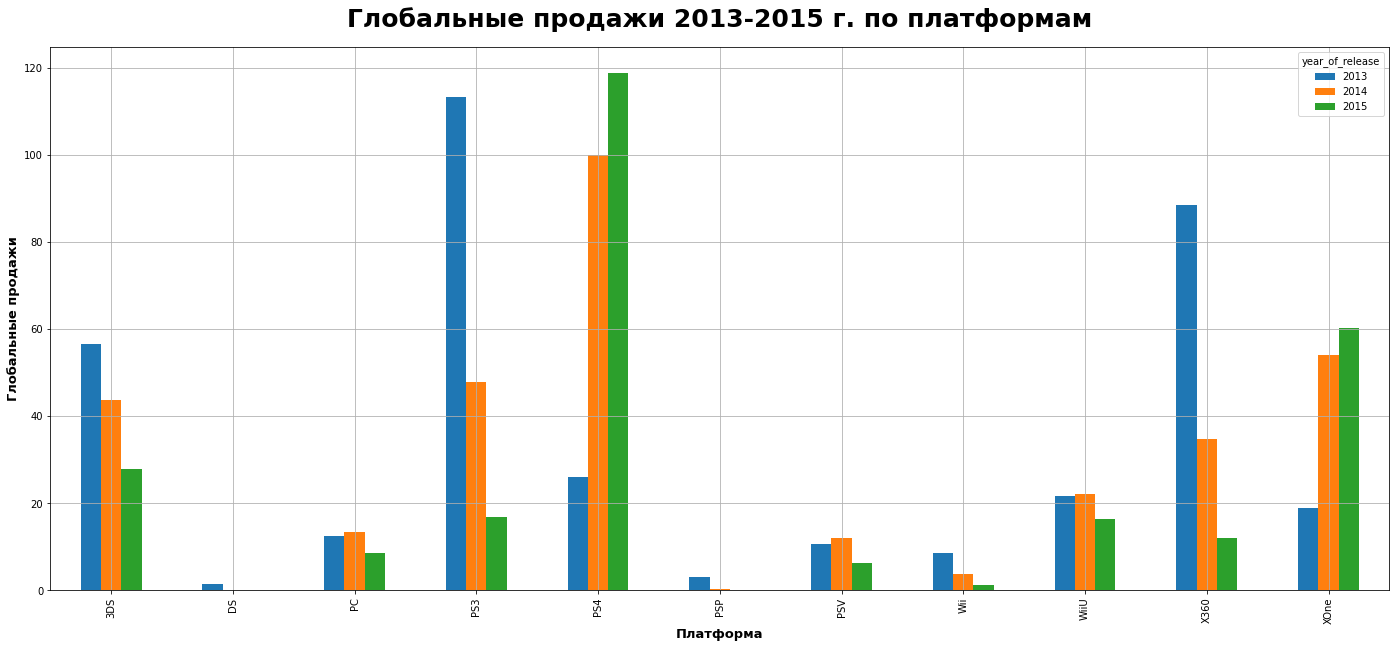

In [30]:

data.pivot_table(index='platform',columns ='year_of_release', values = 'total_sales', aggfunc='sum').plot(kind='bar', grid= True, figsize=(24,10))

plt.xlabel("Платформа", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Глобальные продажи 2013-2015 г. по платформам",fontsize=25,
              fontweight='bold', pad=20)


Какие платформы лидируют по продажам, растут или падают? 

лидируют по продажам : PS4(244.89) ,PS3(177.83), X360(135.28), XOne(133.17),3DS(128.11).

растут: PS4 и XOne.

Падают: все остальные. Наименьший спад у PC	и WiiU.


Потенциально прибыльные платформы - PS4,XOne. Сюда можно ещё добавить 3DS(также в топ-5 по лидерам продаж за 3 года, но идет снижение).

Также для дальнейшего анализа топ5 возьмем ещё 2 платформы :PS3, X360

***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам***

(0.0, 8.0)

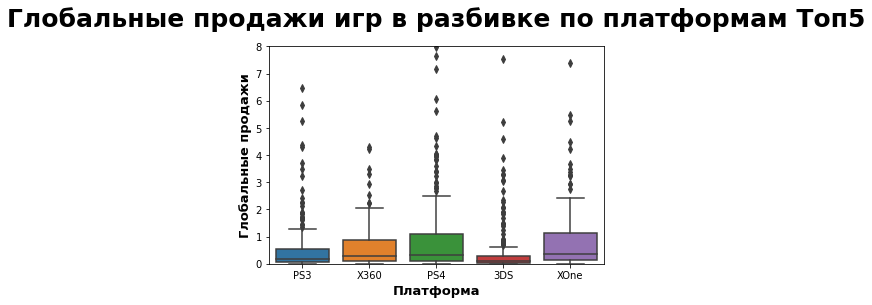

In [31]:
top5 = ['3DS','PS4','XOne','PS3', 'X360'] 
sns.boxplot(data=data.query('platform == @top5'), x='platform', y='total_sales')
sns.set(rc={'figure.figsize':(20,20)})

plt.xlabel("Платформа", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Глобальные продажи игр в разбивке по платформам Топ5",fontsize=25,
              fontweight='bold', pad=20)
plt.ylim(0,8)

In [32]:
top5 = ['3DS','PS4','XOne','PS3', 'X360']
data3=data.query('platform == @top5')
data3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,526.000000,653.000000,1125.000000
mean,2014.074667,0.305742,0.256231,0.082569,0.083707,70.988593,6.477795,0.728249
std,0.806848,0.711453,0.654294,0.303440,0.218304,13.886611,1.544418,1.589313
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,64.000000,5.700000,0.070000
50%,2014.000000,0.080000,0.050000,0.010000,0.020000,74.000000,6.800000,0.220000
75%,2015.000000,0.300000,0.220000,0.060000,0.080000,80.000000,7.700000,0.680000
max,2015.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.200000,21.050000


**Вывод:**

Для PS4 обычные глобальные продажи игр от 0,097 млн до 1.105 млн.р. Медиана 0.31 млн.р. Выбросы начинаются от 2.5 млн. р.

Для XOne обычные глобальные продажи игр от 0,13 млн до 1.137 млн.р. Медиана 0.35 млн.р. Выбросы начинаются от 2.5 млн. р.

Для 3DS обычные глобальные продажи игр от 0,04 млн до 0.29 млн.р.Медиана 0.1 млн.р. Выбросы начинаются от 0.8 млн. р.

Для PS3 обычные глобальные продажи игр от 0,05 млн до 0.56 млн.р.Медиана 0.19 млн.р. Выбросы начинаются от 1.5 млн. р.

Для X360 обычные глобальные продажи игр от 0,09 млн до 0.89 млн.р.Медиана 0.29 млн.р. Выбросы начинаются от 2.3 млн. р.

Для всех 5 платформ (3DS,PS4,XOne,PS3,X360) обычные глобальные продажи игр от 0,07 млн до 0.68 млн.р.Медиана 0.22 млн.р. 

***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами***

***Влияние на продажи внутри платформы PS4 отзывов пользователей***

Text(0.5, 1.0, 'Влияние на продажи внутри платформы PS4 отзывов пользователей')

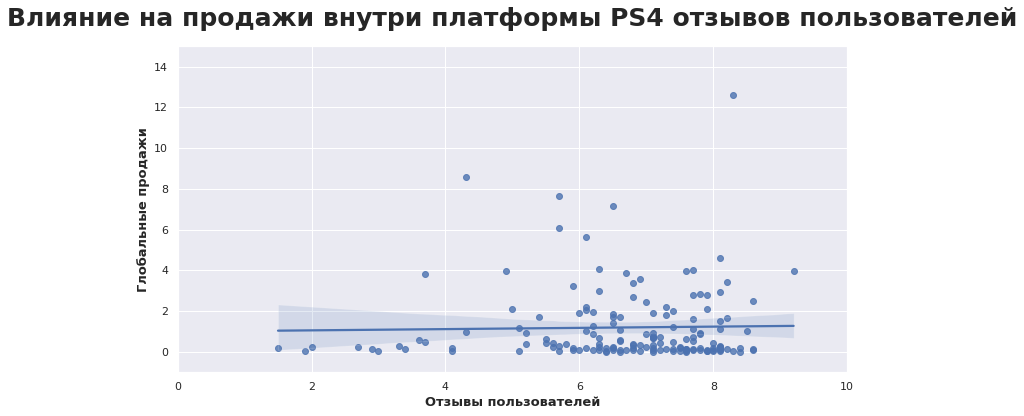

In [33]:
top1 = ['PS4']
plt.figure(figsize=(12,6))
sns.regplot(y='total_sales', x='user_score',data=data.query('platform == @top1'))

plt.ylim(-1,15)
plt.xlim(0,10)

plt.xlabel("Отзывы пользователей", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Влияние на продажи внутри платформы PS4 отзывов пользователей",fontsize=25,
              fontweight='bold', pad=20)

In [34]:
data_top1 = data.query('platform == @top1')
data_top1['total_sales'].corr(data_top1['user_score'])

0.024230832360622553

***Влияние на продажи внутри платформы PS4 отзывов критиков***

Text(0.5, 1.0, 'Влияние на продажи внутри платформы PS4 отзывов критиков')

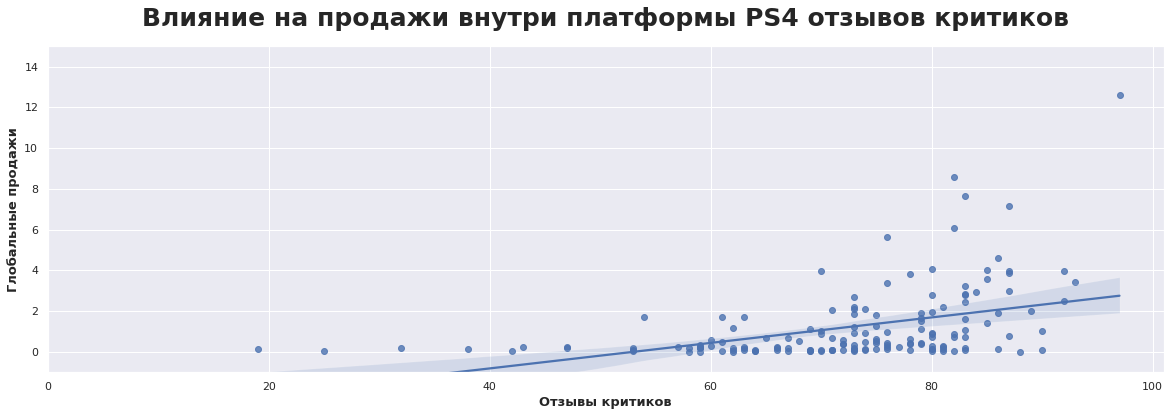

In [35]:
top1 = ['PS4']
plt.figure(figsize=(20,6))
sns.regplot(y='total_sales', x='critic_score',data=data.query('platform == @top1'))

plt.ylim(-1,15)
plt.xlim(0,101)

plt.xlabel("Отзывы критиков", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Влияние на продажи внутри платформы PS4 отзывов критиков",fontsize=25,
              fontweight='bold', pad=20)

In [36]:
data_top1['total_sales'].corr(data_top1['critic_score'])

0.4318482049982005

**Вывод:**  

Влияние на продажи внутри платформы PS4 отзывов пользователей очень слабое.  Корреляция   всего  2.4.

Влияние на продажи внутри платформы PS4 отзывов критиков чуть сильнее , чем отзывов пользвателей, но всё равно слабое. Корреляция 43.1.


***Соотнесем выводы с продажами игр на других платформах***

***Влияние на продажи внутри других платформ,кроме PS4, отзывов пользователей***

Text(0.5, 1.0, 'Влияние на продажи внутри платформы других платформ,кроме PS4,отзывов пользователей')

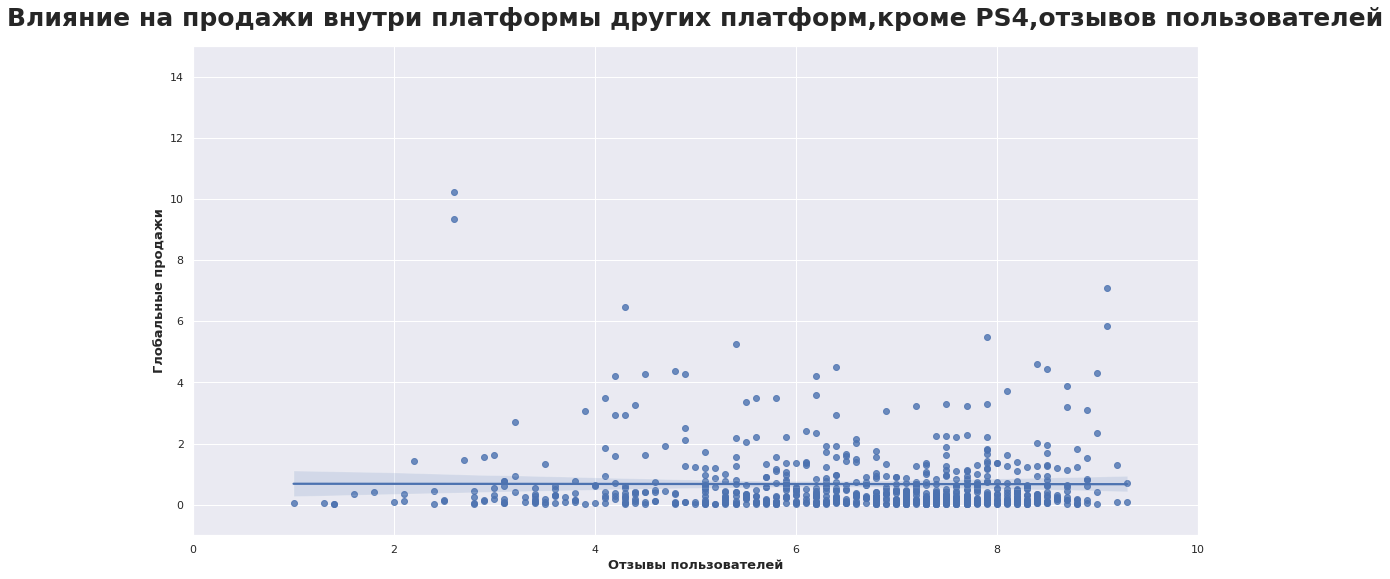

In [37]:
top1 = ['PS4']
plt.figure(figsize=(18,9))
sns.regplot(y='total_sales', x='user_score',data=data.query('platform != @top1'))

plt.ylim(-1,15)
plt.xlim(0,10)

plt.xlabel("Отзывы пользователей", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Влияние на продажи внутри платформы других платформ,кроме PS4,отзывов пользователей",fontsize=25,
              fontweight='bold', pad=20)

In [38]:
data_not_top1 = data.query('platform != @top1')
data_not_top1['total_sales'].corr(data_not_top1['user_score'])

-0.0018845198232425994

***Влияние на продажи внутри других платформ,кроме PS4, отзывов критиков***

Text(0.5, 1.0, 'Влияние на продажи внутри других платформ,кроме PS4, отзывов критиков')

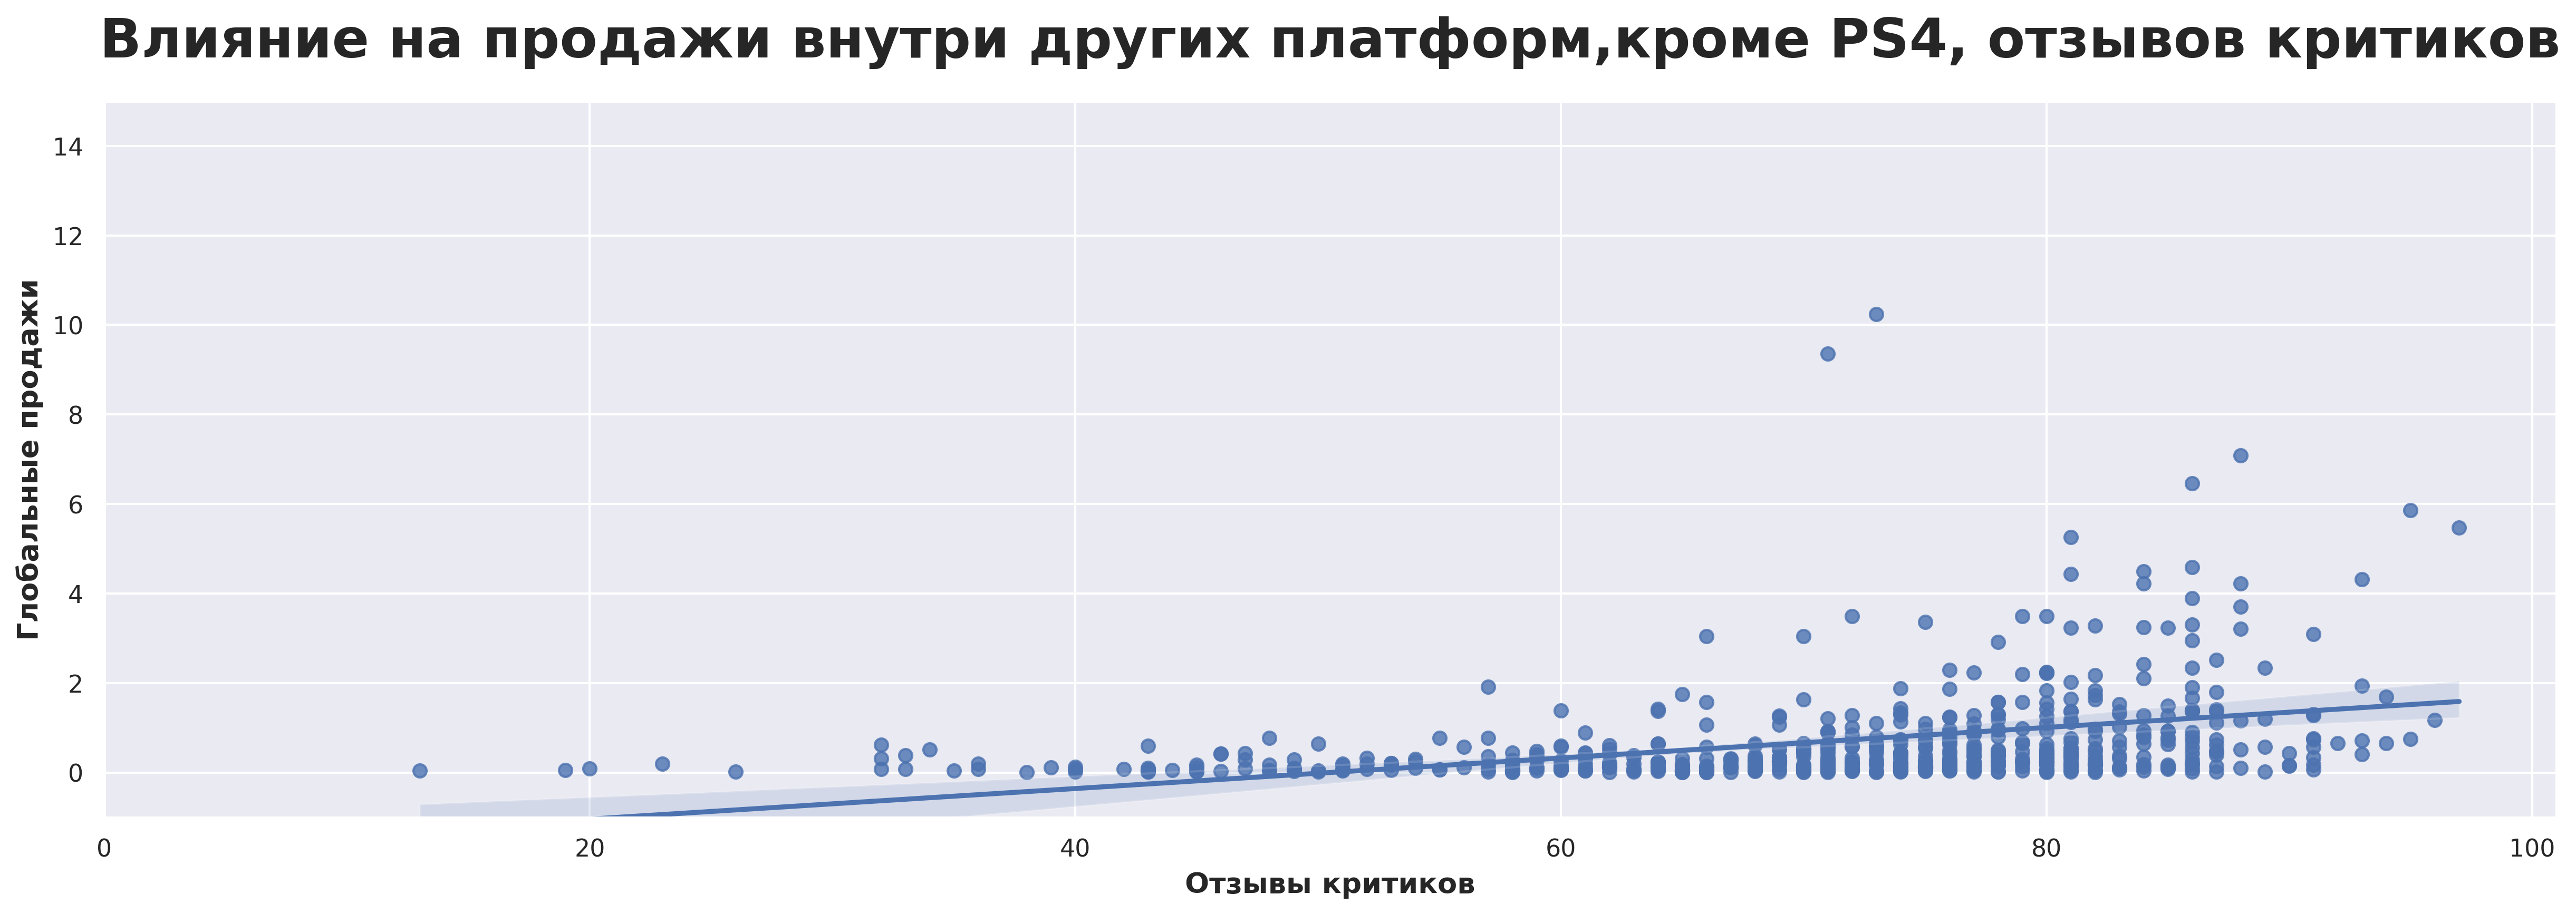

In [39]:
top1 = ['PS4']
plt.figure(figsize=(20,6), dpi=300)
sns.regplot(y='total_sales', x='critic_score',data=data.query('platform != @top1'))

plt.ylim(-1,15)
plt.xlim(0,101)

plt.xlabel("Отзывы критиков", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Влияние на продажи внутри других платформ,кроме PS4, отзывов критиков",fontsize=25,
              fontweight='bold', pad=20)

In [40]:
data_not_top1 = data.query('platform != @top1')
data_not_top1['total_sales'].corr(data_not_top1['critic_score'])

0.3032998949052122

**Вывод:** По сравнению с другими платформами у PS4 ```влияние отзывов пользователей на продажи больше (2.4 у PS4;-0,2 у других).```
Такая же ситуация и с влияением ```отзывов критиков( 43.1 у PS4; 30.3 - у других).``` 

***Посмотрим на общее распределение игр по жанрам.*** 

In [41]:
popularity = pd.DataFrame(data['genre'].value_counts())
popularity

,genre
Action,588
Role-Playing,238
Adventure,189
Sports,166
Shooter,140
Misc,123
Fighting,64
Racing,61
Platform,59
Simulation,44


Text(0.5, 1.0, 'Общее распределение игр по жанрам (%)')

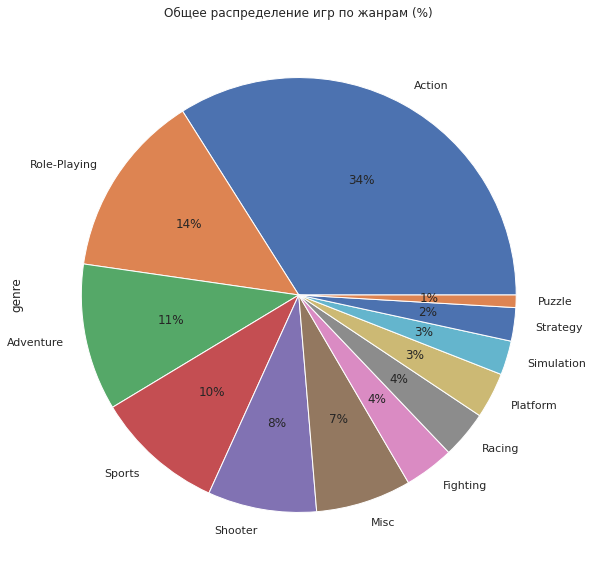

In [42]:
data['genre'].value_counts().plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')
plt.title('Общее распределение игр по жанрам (%)')

***Посмотрим как распределяется прибыльность жанров.***

Посмотрим по медианному значению суммарных продаж:

In [43]:
profitability = pd.DataFrame(data.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales',ascending=False))
profitability

,total_sales
genre,
Shooter,0.585
Sports,0.365
Platform,0.310
Racing,0.220
Misc,0.170
Simulation,0.135
Action,0.130
Fighting,0.130
Role-Playing,0.130


Text(0.5, 1.0, 'Распределение прибыльности жанров 2013-2015 г. по платформам')

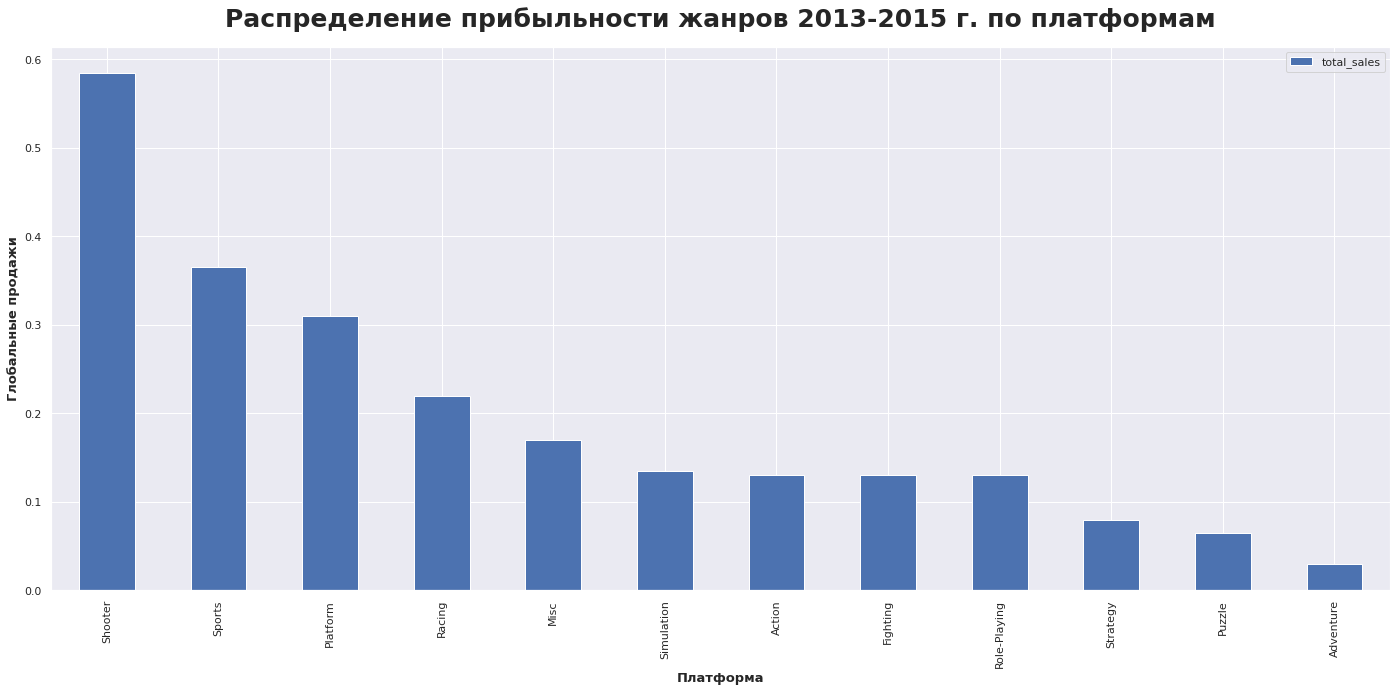

In [44]:
data.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales',ascending=False).plot(kind='bar', grid= True, figsize=(24,10))

plt.xlabel("Платформа", fontsize=13,
              fontweight='bold')
plt.ylabel("Глобальные продажи", fontsize=13,
              fontweight='bold')
plt.title("Распределение прибыльности жанров 2013-2015 г. по платформам",fontsize=25,
              fontweight='bold', pad=20)

Посмотрим взаимосвязь популярности и прибыльности:

In [45]:
profitability['total_sales'].corr(popularity['genre'])

-0.045176850836053536

Взаимосвязь популярности и прибыльности жанров слабая.

**Вывод**
```Всего 12 жанров.```

```Наиболее популярные жанры Action(588/34%),Role-Playing(238/14%),Adventure(189/11%),Sports(166/10%)Shooter (140/8%).Их общая доля 77% от всего количества.```  Наименее популярные Simulation(44/3%),Strategy(43/2%),Puzzle(16/1%).

```Наиболее прибыльные жанры (анализировали по медианному значению суммарных продаж) Shooter(0.585 млн.р),Sports(0.365 млн.р), Platform(0.310), Racing(0.220), Misc(0.170)``` По сравнению с популярными в топ4 добавился жанр Shooter. топ3 наименее прибыльных жанров:Strategy(0.080), Puzzle(0.065), Adventure(0.030)

Взаимосвязь популярности и прибыльности жанров слабая. Распределение и состав в топ5 наиболее популярных/ прибыльных существенно отличается.

**Общий вывод по шагу 3:**

Проведя исследовательский анализ мы выяснили:

***Cколько игр выпускалось в разные годы:***

с 1980 до 1993 выпускалось гораздо меньше новых игр, чем в последующие годы.

```C 1994 года шёл постепенный рост. Максимальные значения в 2008-2009 годах. Затем наблюдается снижение.```

***Как менялись продажи по платформам:***

```Наибольшие суммарные продажи у PS2(1233.56), X360(961.24), PS3(931.33), Wii(891.18), DS(802.78), PS(727.58)```

Средняя продолжительность платформ 7.6 лет. По гистограмме видно, что обычно до 12 лет.

Возьмём данные за соответствующий актуальный период. ***Актуальный период определим с 2013 по 2015*** (с момента спада в 2009 имеет относительно стабильные показатели по выпуску новых игр). ***Не учитываем в последующем анализе данные за предыдущие годы.***

***Какие платформы лидируют по продажам, растут или падают?***

```лидируют по продажам : PS4(244.89) ,PS3(177.83), X360(135.28), XOne(133.17),3DS(128.11).```

```растут: PS4 и XOne.```

```Падают: все остальные.``` Наименьший спад у PC и WiiU.

```Потенциально прибыльные платформы - PS4,XOne.``` Также сюда можно ещё добавить ``3DS``(также в топ-5 по лидерам продаж за 3 года, но идет снижение).

Также для дальнейшего анализа топ5 возьмем ещё 2 платформы :PS3, X360

***Анализ для топ5 : PS4,XOne, 3DS, PS3, X360:***

Для PS4 обычные глобальные продажи игр от 0,097 млн до 1.105 млн.р. Медиана 0.31 млн.р. Выбросы начинаются от 2.5 млн. р.

Для XOne обычные глобальные продажи игр от 0,13 млн до 1.137 млн.р. Медиана 0.35 млн.р. Выбросы начинаются от 2.5 млн. р.

Для 3DS обычные глобальные продажи игр от 0,04 млн до 0.29 млн.р.Медиана 0.1 млн.р. Выбросы начинаются от 0.8 млн. р.

Для PS3 обычные глобальные продажи игр от 0,05 млн до 0.56 млн.р.Медиана 0.19 млн.р. Выбросы начинаются от 1.5 млн. р.

Для X360 обычные глобальные продажи игр от 0,09 млн до 0.89 млн.р.Медиана 0.29 млн.р. Выбросы начинаются от 2.3 млн. р.

Для всех 5 платформ (3DS,PS4,XOne,PS3,X360) обычные глобальные продажи игр от 0,07 млн до 0.68 млн.р.Медиана 0.22 млн.р.

```Для всех 3 платформ (3DS,PS4,XOne) обычные глобальные продажи игр от 0,07 млн до 0.72 млн.р.Медиана 0.21 млн.р.```

***Анализ для топ1 - PS4:***

```Влияние на продажи внутри платформы PS4 отзывов пользователей очень слабое.``` Корреляция всего 2.4.

```Влияние на продажи внутри платформы PS4 отзывов критиков чуть сильнее , чем отзывов пользвателей, но всё равно слабое.``` Корреляция 43.1.

По сравнению с другими платформами у PS4 ```влияние отзывов пользователей на продажи больше (2.4 у PS4;-0,2 у других).```
Такая же ситуация и с влияением ```отзывов критиков( 43.1 у PS4; 30.3 - у других).``` 

***Анализ популярности и прибыльности жанров для всех платформ (2013-2015):***

```Всего 12 жанров.```

```Наиболее популярные жанры Action(588/34%),Role-Playing(238/14%),Adventure(189/11%),Sports(166/10%)Shooter (140/8%).Их общая доля 77% от всего количества.```  Наименее популярные Simulation(44/3%),Strategy(43/2%),Puzzle(16/1%).

```Наиболее прибыльные жанры (анализировали по медианному значению суммарных продаж) Shooter(0.585 млн.р),Sports(0.365 млн.р), Platform(0.310), Racing(0.220), Misc(0.170)``` По сравнению с популярными в топ4 добавился жанр Shooter. топ3 наименее прибыльных жанров:Strategy(0.080), Puzzle(0.065), Adventure(0.030)

Взаимосвязь популярности и прибыльности жанров слабая. Распределение и состав в топ5 наиболее популярных/ прибыльных существенно отличается.

#### Шаг 4. Составление портрета пользователя каждого региона

***Определим для пользователя каждого региона (NA, EU, JP):***

NA - Северная Америка

EU - Европа

JP - Япониия 

***4.1 Самые популярные платформы (топ-5).***

Северная Америка:

In [46]:
data_na = pd.DataFrame ((data.pivot_table(index='platform', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)), columns=['na_sales'])
data_na

,na_sales
platform,
PS4,87.25
X360,80.97
XOne,78.85
PS3,62.83
3DS,34.06
WiiU,27.11
PC,9.75
Wii,6.50
PSV,4.89


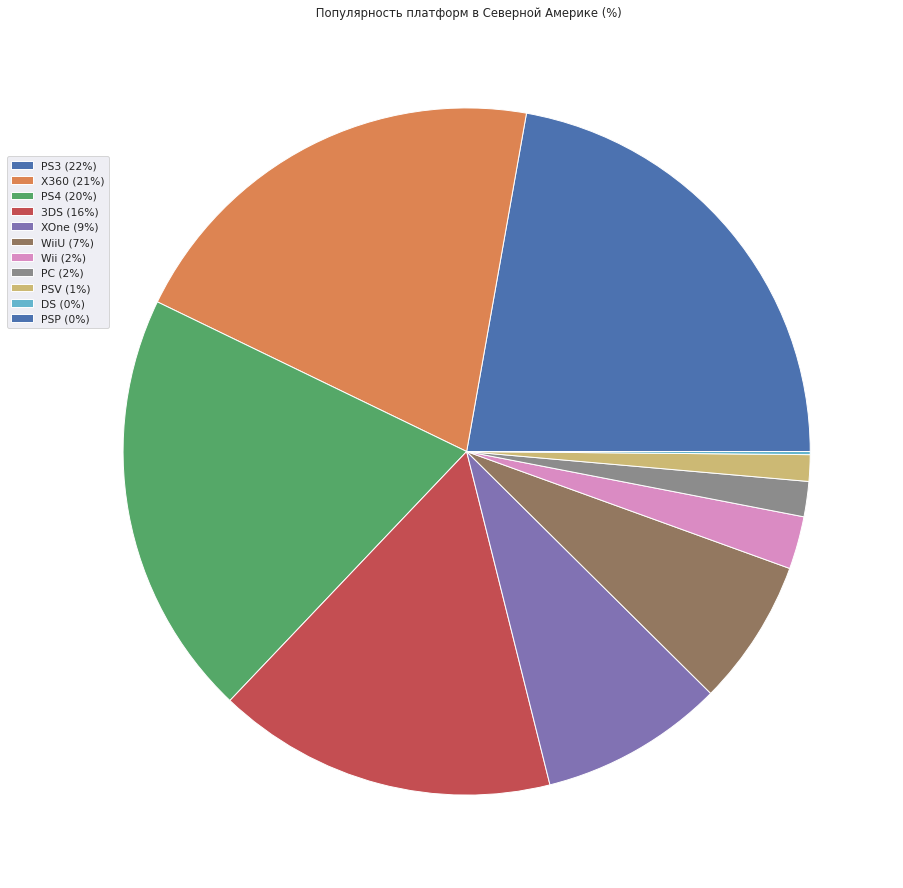

In [47]:
data_na_plat = data['platform'].unique()
total = sum(data_na['na_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_na_plat, data_na['na_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность платформ в Северной Америке (%)')

plt.pie(
    data_na['na_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Европа:

In [48]:
data_eu = pd.DataFrame ((data.pivot_table(index='platform', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)), columns=['eu_sales'])
data_eu

,eu_sales
platform,
PS4,109.31
PS3,66.55
XOne,41.96
X360,41.81
3DS,28.63
PC,21.83
WiiU,18.37
Wii,5.82
PSV,5.71


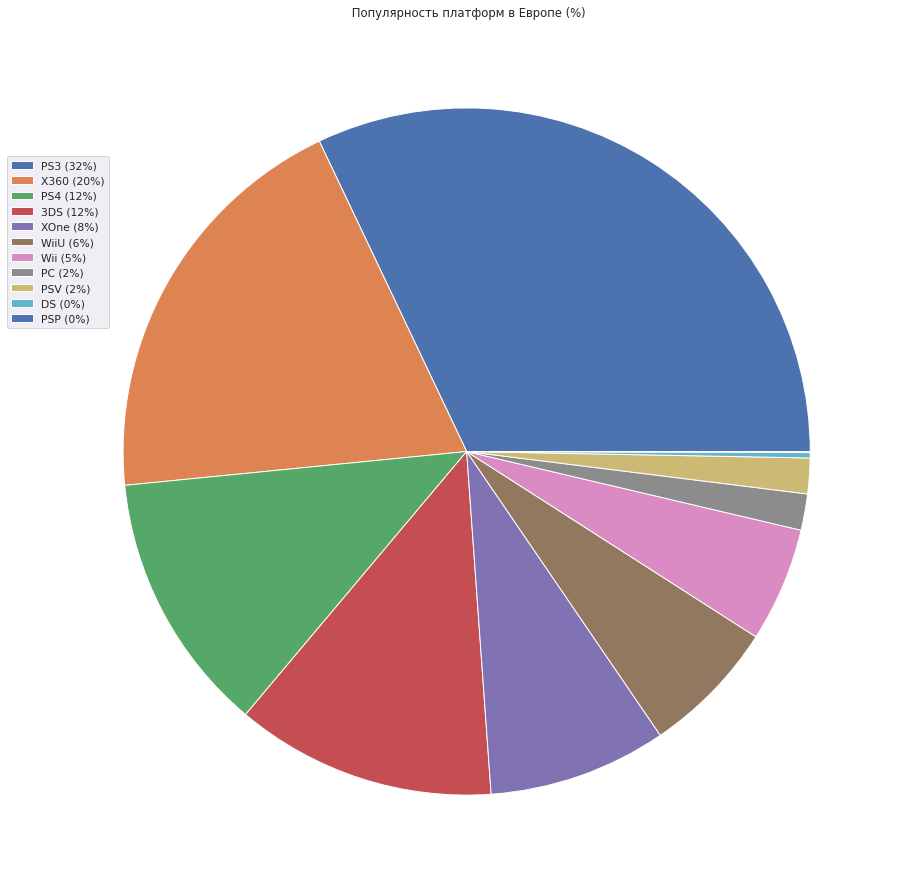

In [49]:
data_eu_plat = data['platform'].unique()
total = sum(data_eu['eu_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_eu_plat, data_eu['eu_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность платформ в Европе (%)')

plt.pie(
    data_eu['eu_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Япония:

In [50]:
data_jp = pd.DataFrame ((data.pivot_table(index='platform', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)), columns=['jp_sales'])
data_jp

,jp_sales
platform,
3DS,59.78
PS3,22.05
PSV,15.03
PS4,10.22
WiiU,10.21
PSP,3.29
X360,0.51
XOne,0.33
Wii,0.05


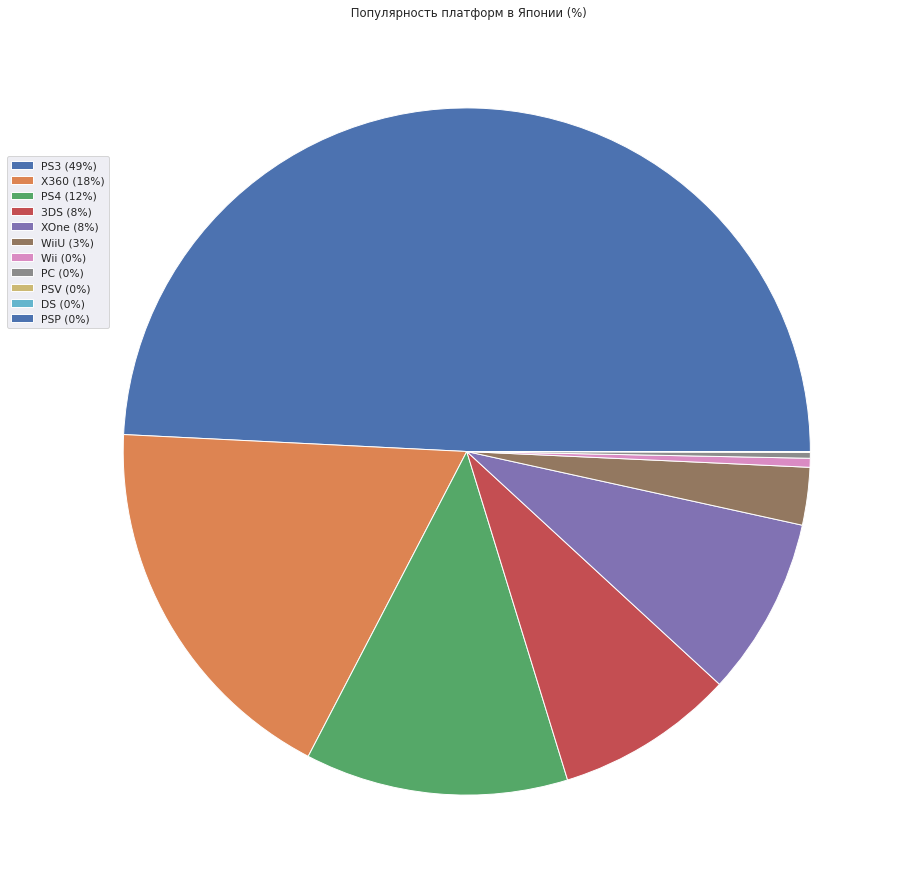

In [51]:
data_jp_plat = data['platform'].unique()
total = sum(data_jp['jp_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_jp_plat, data_jp['jp_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность платформ в Японии (%)')

plt.pie(
    data_jp['jp_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Для 3х регионов:

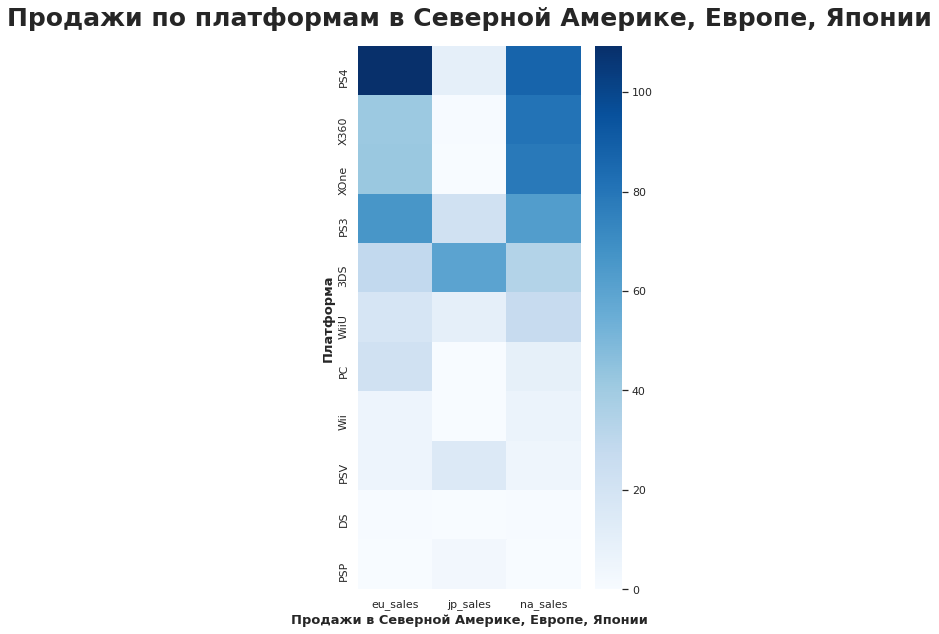

In [52]:
pivot=data.pivot_table(index='platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False)
fig,ax=plt.subplots(figsize=(5,10))
sns.heatmap(pivot,cmap="Blues",ax=ax)
plt.xlabel("Продажи в Северной Америке, Европе, Японии", fontsize=13,
              fontweight='bold')
plt.ylabel("Платформа", fontsize=13,
              fontweight='bold')
plt.title("Продажи по платформам в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)
plt.show()

Text(0.5, 1.0, 'Продажи по платформам в Северной Америке, Европе, Японии')

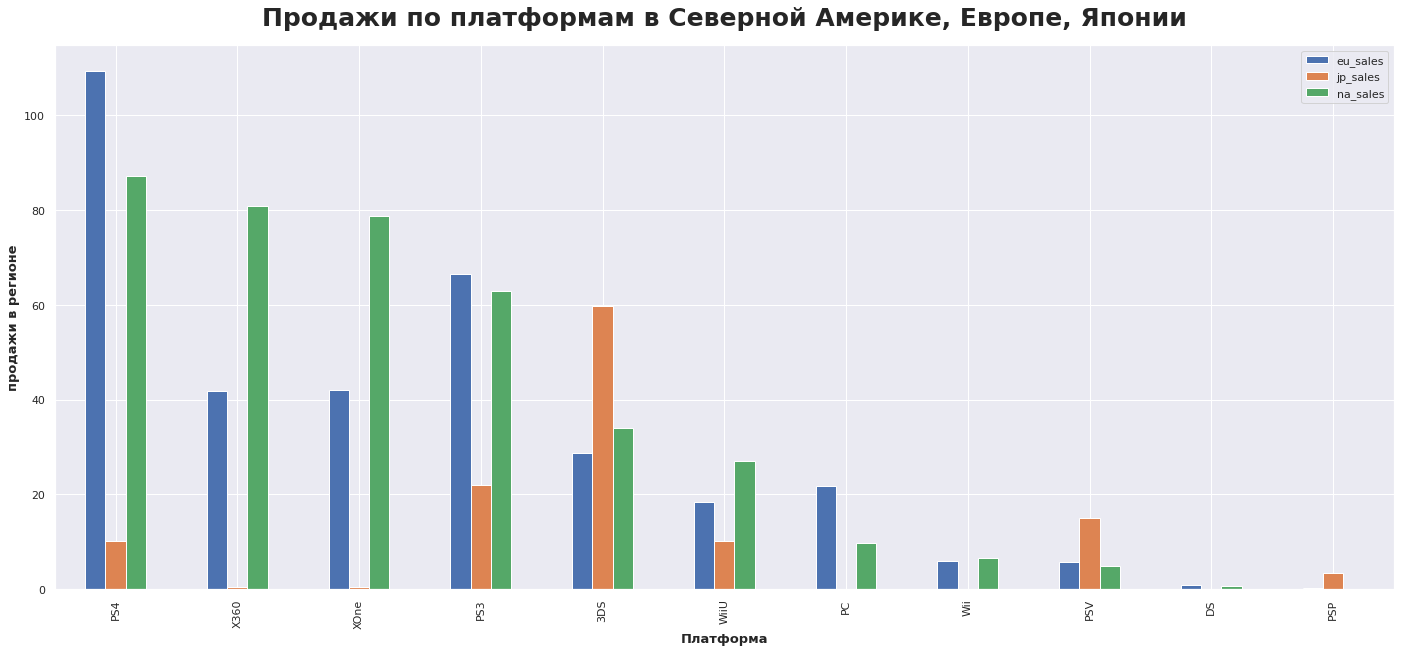

In [53]:
data.pivot_table(index='platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar', grid= True, figsize=(24,10))

plt.xlabel("Платформа", fontsize=13,
              fontweight='bold')
plt.ylabel("продажи в регионе", fontsize=13,
              fontweight='bold')
plt.title("Продажи по платформам в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)

**Вывод** 

```Топ5 для Северной Америки:PS4 (22%),	X360(21%),XOne(20%),PS3(16%),3DS(9%)```

```Топ5 для Европа:PS4(32%),PS3(20%),XOne(12%),X360(12%),3DS(8%)```

```Топ5 для Японии:3DS(49%),PS3(18%),PSV(12%),PS4(8%),WiiU(8%)```

Для Северной Америки и Европы платформы, входящие в Топ5 по продажам, одинаковы. Различаются  доли продаж. В Северной Америки в основном практически равномерно распределены  между 3 платформами PS4 (22%),X360(21%),XOne(20%). В Европе лидируют PS4(32%), PS3(20%).

Существенно различие Северной Америки и Европы с Японией. Вместо XOne и X360 в Японии в Топ5 вошли WiiU и PSV. Существенную долю(49%) занимает 3DS. Остальные гораздо меньше.








***4.2 Самые популярные жанры (топ-5)***

Северная Америка:

In [54]:
data_na2 = pd.DataFrame ((data.pivot_table(index='genre', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)), columns=['na_sales'])
data_na2

,na_sales
genre,
Action,116.76
Shooter,93.50
Sports,57.73
Role-Playing,40.51
Misc,26.73
Platform,16.85
Fighting,13.71
Racing,12.23
Adventure,6.19


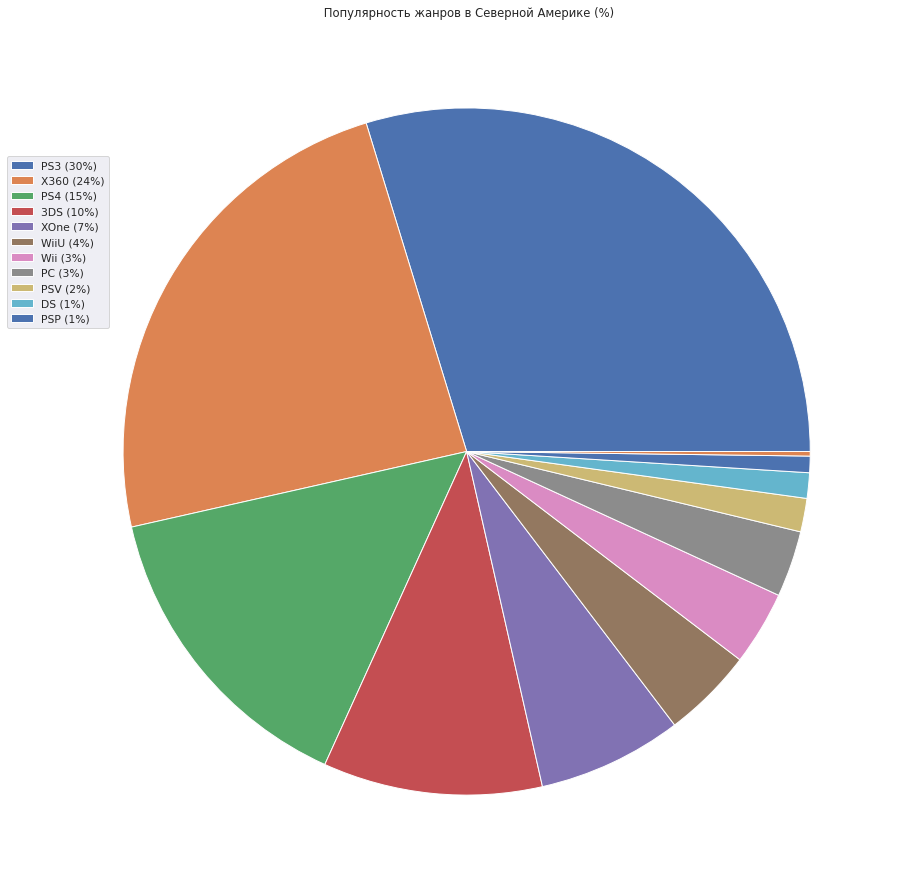

In [55]:
data_na2_plat = data['platform'].unique()
total = sum(data_na2['na_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_na_plat, data_na2['na_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность жанров в Северной Америке (%)')

plt.pie(
    data_na2['na_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Европа:

In [56]:
data_eu2 = pd.DataFrame ((data.pivot_table(index='genre', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)), columns=['eu_sales'])
data_eu2

,eu_sales
genre,
Action,107.45
Shooter,71.96
Sports,48.51
Role-Playing,32.69
Misc,19.38
Racing,18.42
Platform,14.19
Simulation,9.65
Fighting,7.21


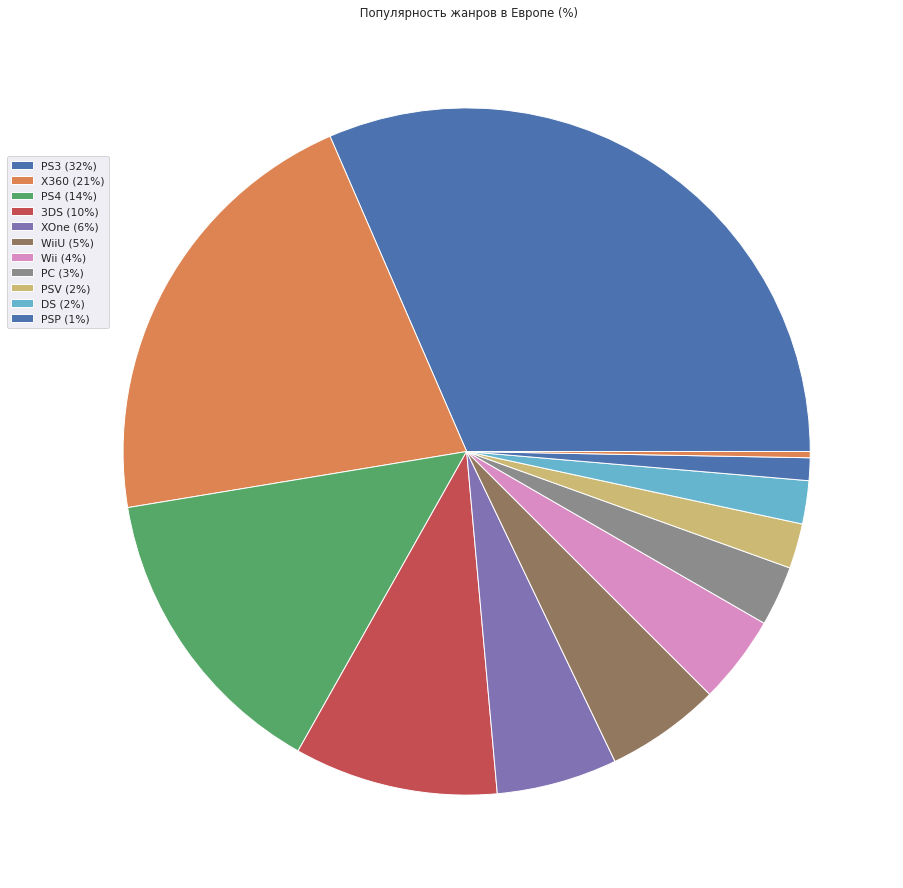

In [57]:
data_eu2_plat = data['platform'].unique()
total = sum(data_eu2['eu_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_eu_plat, data_eu2['eu_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность жанров в Европе (%)')

plt.pie(
    data_eu2['eu_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Япония:

In [58]:
data_jp2 = pd.DataFrame ((data.pivot_table(index='genre', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)), columns=['jp_sales'])
data_jp2

,jp_sales
genre,
Role-Playing,44.43
Action,33.42
Misc,8.16
Fighting,6.90
Shooter,5.55
Platform,4.68
Adventure,4.64
Sports,4.49
Simulation,4.19


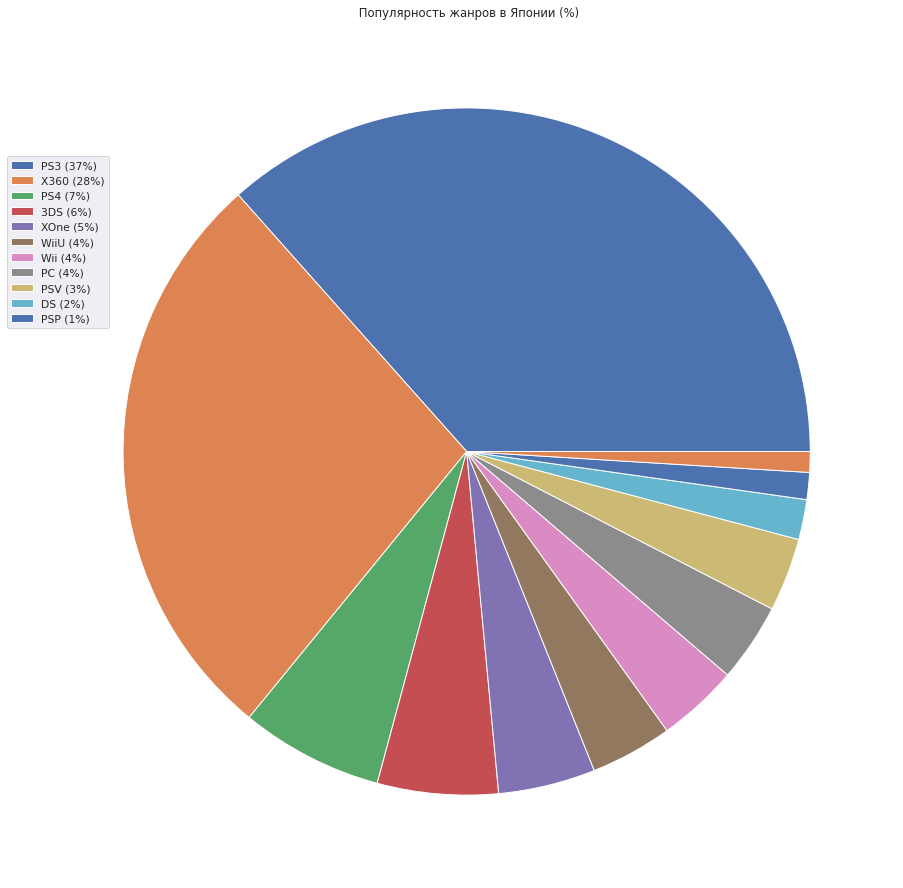

In [59]:
data_jp2_plat = data['platform'].unique()
total = sum(data_jp2['jp_sales'])
labels = [f"{n} ({v/total:.0%})" for n,v in zip(data_jp_plat, data_jp2['jp_sales'])]

dpi = 70
fig = plt.figure(dpi = dpi, figsize = (1200 / dpi, 900 / dpi) )

plt.title(' Популярность жанров в Японии (%)')

plt.pie(
    data_jp2['jp_sales'], radius=1.0)
plt.legend(
    bbox_to_anchor = (-0.16, 0.60, 0.25, 0.25),
    loc = 'best', labels = labels )
plt.tight_layout()

Для 3х регионов:

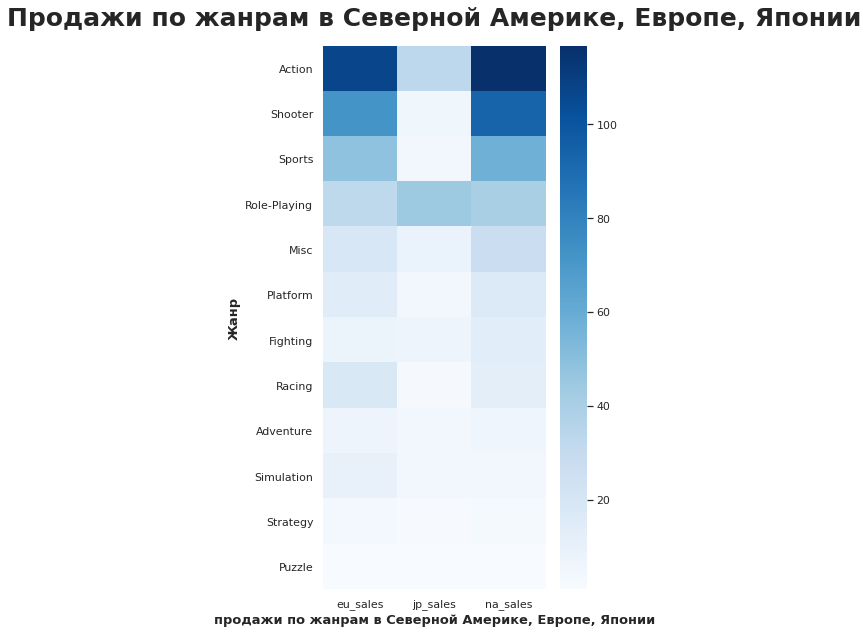

In [60]:
pivot2=data.pivot_table(index='genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False)
fig,ax=plt.subplots(figsize=(5,10))
sns.heatmap(pivot2,cmap="Blues",ax=ax)
plt.xlabel("продажи по жанрам в Северной Америке, Европе, Японии", fontsize=13,
              fontweight='bold')
plt.ylabel("Жанр", fontsize=13,
              fontweight='bold')
plt.title("Продажи по жанрам в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)
plt.show()

Text(0.5, 1.0, 'Продажи по жанрам в Северной Америке, Европе, Японии')

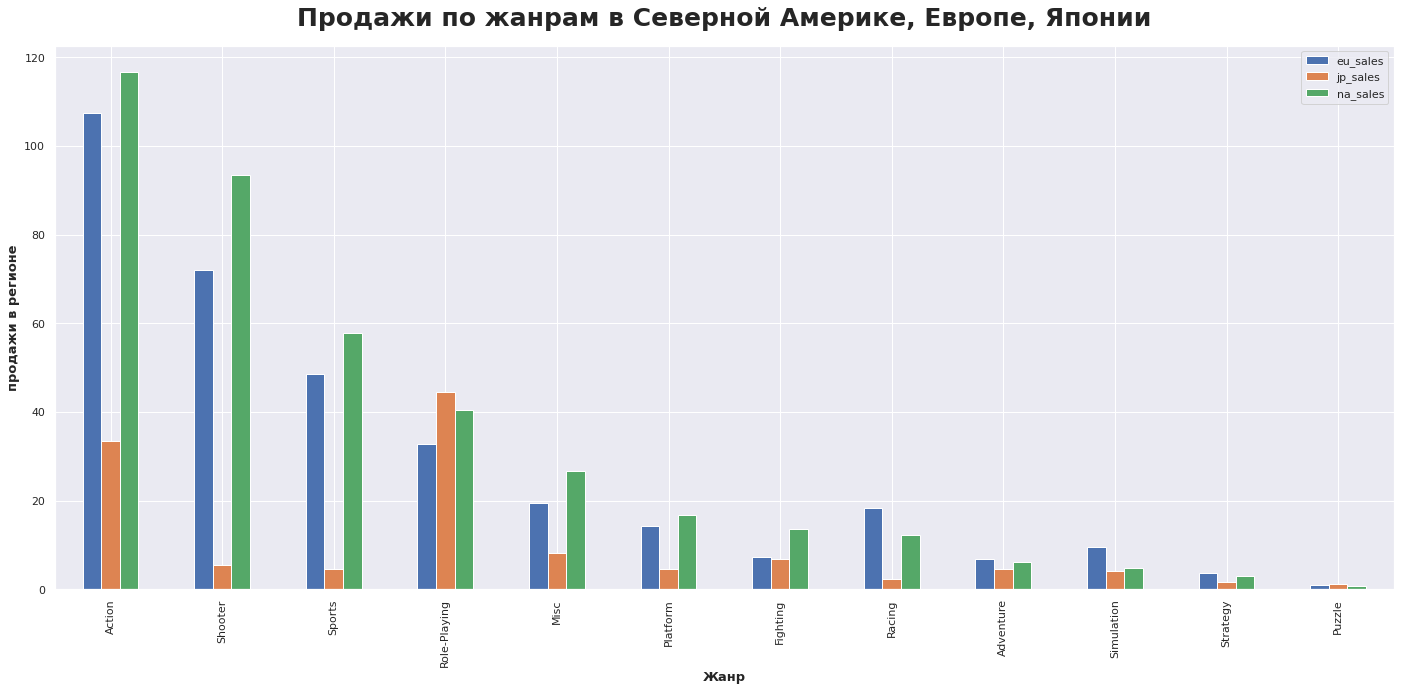

In [61]:
data.pivot_table(index='genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar', grid= True, figsize=(24,10))

plt.xlabel("Жанр", fontsize=13,
              fontweight='bold')
plt.ylabel("продажи в регионе", fontsize=13,
              fontweight='bold')
plt.title("Продажи по жанрам в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)

**Вывод:**

```Топ5 для Северной Америки:Action(30%),Shooter(24%), Sports(15%),Role-Playing(10%),Misc(7%)```

```Топ5 для Европа:Action(32%),Shooter(21%), Sports(14%),Role-Playing(10%),Misc(6%)```

```Топ5 для Японии:Role-Playing(37%), Action(28%),Misc(7%), Fighting(6%),Shooter(5%)```

Для Северной Америки и Европы жанры , входящие в Топ5 по продажам, одинаковы. Доли продаж также не сильно различаются. В Северной Америки и Европе лидируют Action и Shooter (их общая доля для Северной Америки - 54%, для Европы - 53%)

Существенно различие Северной Америки и Европы с Японией. Вместо Sports в Японии в Топ5 вошел  Fighting. Существенную долю(65%) занимают Role-Playing(37%), Action(28%). Остальные - гораздо меньше.

***4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?***

```Расшифровка:```

```EC```	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

```E```	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.

```E 10+```	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

```T```	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

```M```	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

```AO```	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

```RP```	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Северная Америка:

In [62]:
data_na3 = pd.DataFrame ((data.pivot_table(index='rating', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)), columns=['na_sales'])
data_na3

,na_sales
rating,
M,149.54
E,71.08
E10+,50.43
T,40.84


Text(0.5, 1.0, ' Продажи в зависимости от  рейтинга ESRB в Северной Америке (%)')

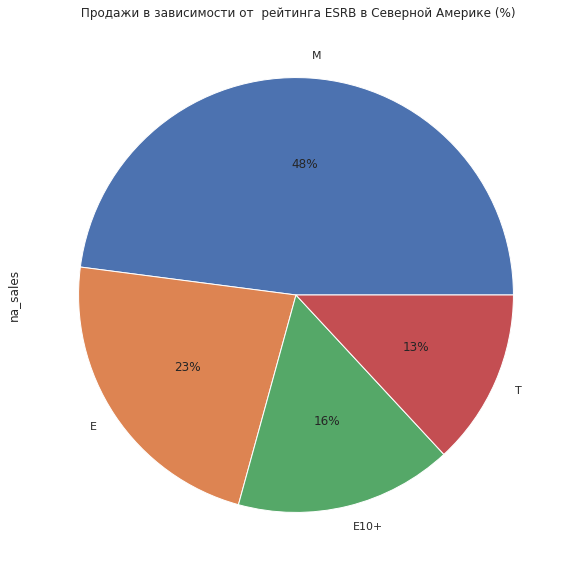

In [63]:
data_na3['na_sales'].plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')
plt.title(' Продажи в зависимости от  рейтинга ESRB в Северной Америке (%)')

Европа:

In [64]:
data_eu3 = pd.DataFrame ((data.pivot_table(index='rating', values = 'eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)), columns=['eu_sales'])
data_eu3

,eu_sales
rating,
M,128.78
E,69.75
E10+,38.88
T,32.16


Text(0.5, 1.0, ' Продажи в зависимости от  рейтинга ESRB в Европе (%)')

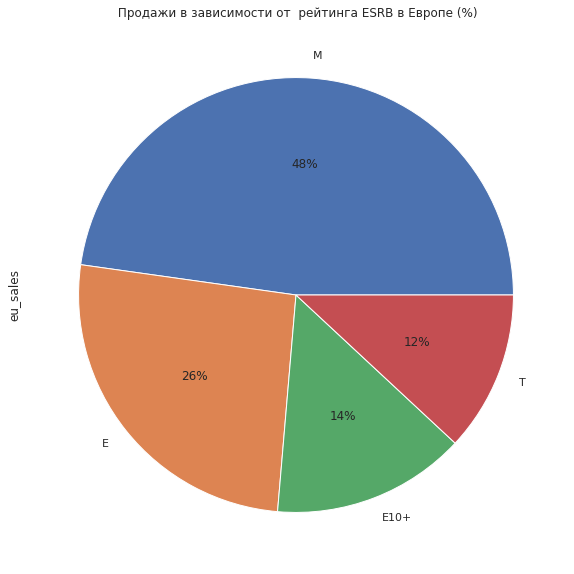

In [65]:
data_eu3['eu_sales'].plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')
plt.title(' Продажи в зависимости от  рейтинга ESRB в Европе (%)')

Япония:

In [66]:
data_jp3 = pd.DataFrame ((data.pivot_table(index='rating', values = 'jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)), columns=['jp_sales'])
data_jp3

,jp_sales
rating,
T,18.32
E,14.07
M,12.91
E10+,5.44


Text(0.5, 1.0, ' Продажи в зависимости от  рейтинга ESRB в Японии (%)')

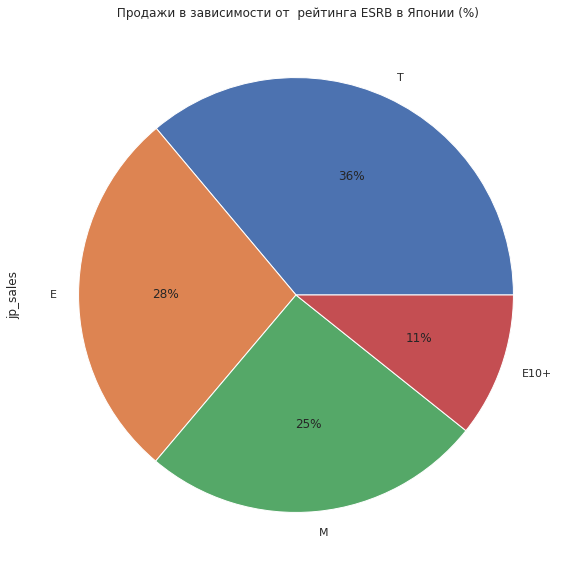

In [67]:
data_jp3['jp_sales'].plot(kind ='pie', figsize=(10, 10), autopct='%1.0f%%')
plt.title(' Продажи в зависимости от  рейтинга ESRB в Японии (%)')

для 3х регионов:

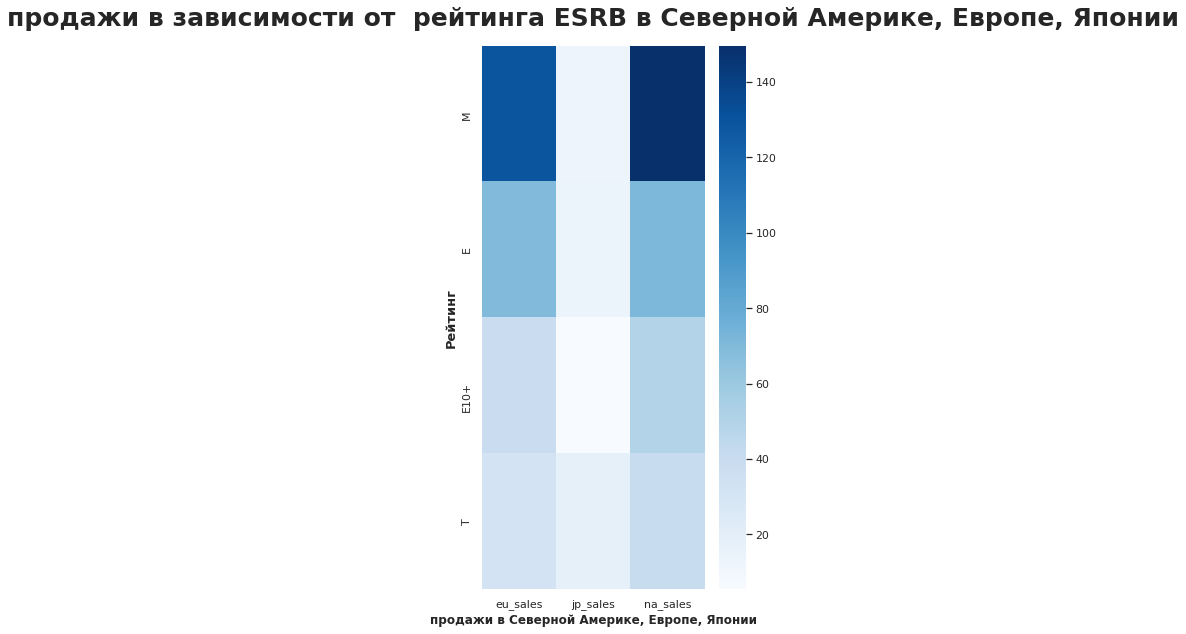

In [68]:
pivot3=data.pivot_table(index='rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False)
fig,ax=plt.subplots(figsize=(5,10))
sns.heatmap(pivot3,cmap="Blues",ax=ax)
plt.xlabel("продажи в Северной Америке, Европе, Японии", fontsize=12,
              fontweight='bold')
plt.ylabel("Рейтинг", fontsize=13,
              fontweight='bold')
plt.title("продажи в зависимости от  рейтинга ESRB в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)
plt.show()

Text(0.5, 1.0, 'продажи в зависимости от  рейтинга ESRB в Северной Америке, Европе, Японии')

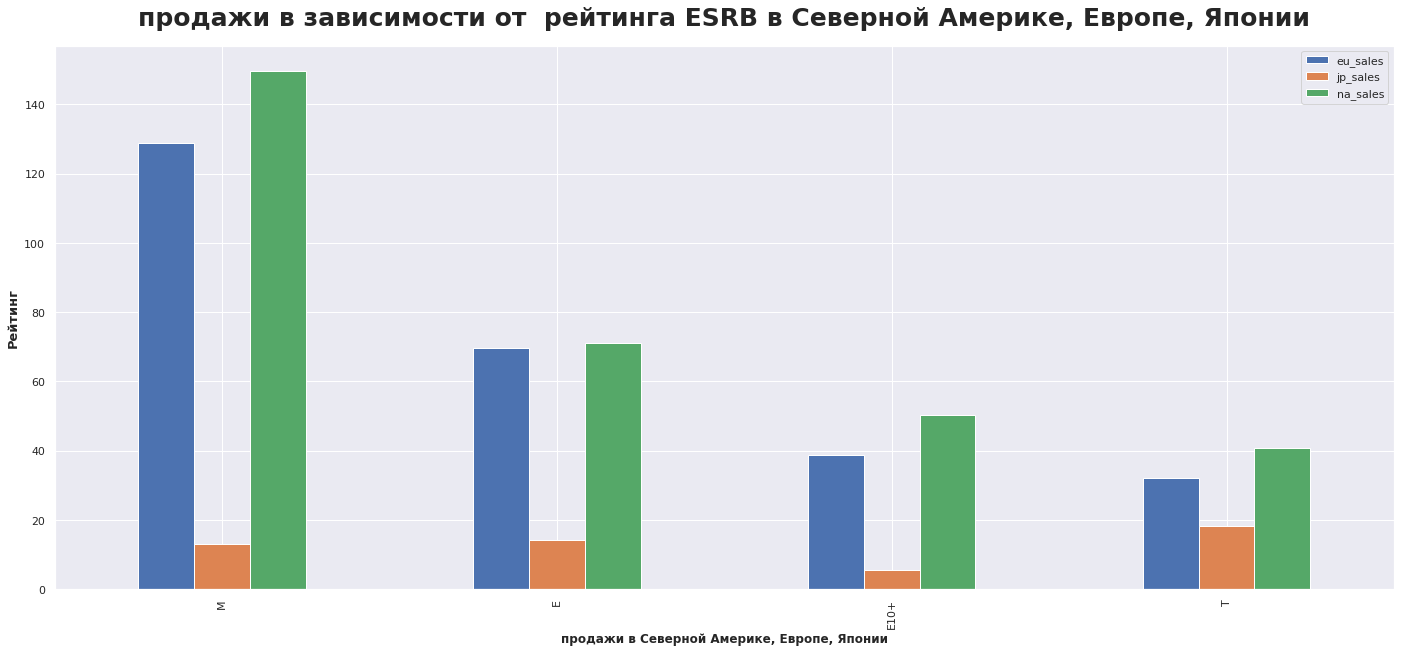

In [69]:
data.pivot_table(index='rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='bar', grid= True, figsize=(24,10))

plt.xlabel("продажи в Северной Америке, Европе, Японии", fontsize=12,
              fontweight='bold')
plt.ylabel("Рейтинг", fontsize=13,
              fontweight='bold')
plt.title("продажи в зависимости от  рейтинга ESRB в Северной Америке, Европе, Японии",fontsize=25,
              fontweight='bold', pad=20)

**Вывод:**

всего в данных регионах представлено 4 возрастных рейтинги. Все 4 представлены во всех 3х регионах.
Еще раз пропишем расшифровку этих категорий:

```E```	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

```E``` 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 

```T```	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

```M```	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 

```продажи в зависимости от  рейтинга ESRB в Северной Америке:M(48%), E(23%), E10+(16%), T(13%)```

```продажи в зависимости от  рейтинга ESRB в  Европе:M(48%), E(26%), E10+(14%), T(12%)```

```продажи в зависимости от  рейтинга ESRB в Японии:T(36%),E(28%), M(25%), E10+(11%)```


Для Северной Америки и Европы  доли продаж в зависимости от рейтинга не сильно различаются. ```В Северной Америки и Европе лидирует возрастной рейтинг M(48% и в Северной Америке и в Европе)```

```Существенно различие Северной Америки и Европы с Японией.  Существенную долю(36%) занима рейтинг Т. Популярный в Северной Америке и Евроме рейтинг М здесь только на 3м месте(25%)```. ```Т.е. в Северной Америке и Европе популярнее игры с для лиц старше 17 с  реалистичным изображением насилия, в то время как в Японии более популярны игры для менее взрослых и менее реалистичным изображением насилия.```


**Общий вывод по шагу 4:**


**Отдельный анализ для каждого региона (NA, EU, JP)**


**Топ5 по платформам**

```Топ5 для Северной Америки:PS4 (22%),	X360(21%),XOne(20%),PS3(16%),3DS(9%)```

```Топ5 для Европа:PS4(32%),PS3(20%),XOne(12%),X360(12%),3DS(8%)```

```Топ5 для Японии:3DS(49%),PS3(18%),PSV(12%),PS4(8%),WiiU(8%)```

Для Северной Америки и Европы платформы, входящие в Топ5 по продажам, одинаковы. Различаются  доли продаж. В Северной Америки в основном практически равномерно распределены  между 3 платформами PS4 (22%),X360(21%),XOne(20%). В Европе лидируют PS4(32%), PS3(20%).

Существенно различие Северной Америки и Европы с Японией. Вместо XOne и X360 в Японии в Топ5 вошли WiiU и PSV. Существенную долю(49%) занимает 3DS. Остальные гораздо меньше.



**Топ5 по жанрам**

```Топ5 для Северной Америки:Action(30%),Shooter(24%), Sports(15%),Role-Playing(10%),Misc(7%)```

```Топ5 для Европа:Action(32%),Shooter(21%), Sports(14%),Role-Playing(10%),Misc(6%)```

```Топ5 для Японии:Role-Playing(37%), Action(28%),Misc(7%), Fighting(6%),Shooter(5%)```

Для Северной Америки и Европы жанры , входящие в Топ5 по продажам, одинаковы. Доли продаж также не сильно различаются. В Северной Америке и Европе лидируют Action и Shooter (их общая доля для Северной Америки - 54%, для Европы - 53%)

Существенно различие Северной Америки и Европы с Японией. Вместо Sports в Японии в Топ5 вошел  Fighting. Существенную долю(65%) занимают Role-Playing(37%), Action(28%). Остальные - гораздо меньше.



**продажи в зависимости от  рейтинга ESRB**

всего в данных регионах представлено 4 возрастных рейтинги. Все 4 представлены во всех 3х регионах.
Еще раз пропишем расшифровку этих категорий:

```E```	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

```E``` 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 

```T```	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

```M```	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 

```продажи в зависимости от  рейтинга ESRB в Северной Америке:M(48%), E(23%), E10+(16%), T(13%)```

```продажи в зависимости от  рейтинга ESRB в  Европе:M(48%), E(26%), E10+(14%), T(12%)```

```продажи в зависимости от  рейтинга ESRB в Японии:T(36%),E(28%), M(25%), E10+(11%)```


Для Северной Америки и Европы  доли продаж в зависимости от рейтинга не сильно различаются. ```В Северной Америке и Европе лидирует возрастной рейтинг M(48% и в Северной Америке, и в Европе)```

```Существенно различие Северной Америки и Европы с Японией.  Существенную долю(36%) занима рейтинг Т. Популярный в Северной Америке и Европе рейтинг М здесь только на 3м месте(25%)```. ```Т.е. в Северной Америке и Европе популярнее игры  для лиц старше 17 с  реалистичным изображением насилия, в то время как в Японии более популярны игры для менее взрослых и менее реалистичным изображением насилия.```

**Таким образом,  в Северной Америке и Европе данные по платформам , жанрам и рейтингам ESRB достаточно похожи. Существенно различие Северной Америки и Европы с Японией.**

#### Шаг 5. Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформируем нулевую и альтернативную гипотезы :

```H0 - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".```

```H1 - "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые".```

```Две независимые выборки.``` Для проверки гипотез используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ```scipy.stats.ttest_ind```(array1, array2, equal_var, alternative) Альернативная гипотеза - двусторонняя.

Уровень статистической значимости установим в 5%

In [70]:
xbox_one = data[(data['platform']=='XOne')&(data['user_score']>=0)]['user_score']
pc = data[(data['platform']=='PC')&(data['user_score']>=0)]['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2827494983260732
Не получилось отвергнуть нулевую гипотезу


Проверим:

In [71]:
print('xbox_one',xbox_one.mean())
print('pc', pc.mean())
print('Разница',xbox_one.mean()-pc.mean())

xbox_one 6.477586206896552
pc 6.258181818181818
Разница 0.2194043887147341


**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Сформируем нулевую и альтернативную гипотезы :

```H0 - "Средние пользовательские рейтинги жанров Action и Sports одинаковые".```

```H1 - "Средние пользовательские рейтинги жанров Action и Sports разные".```

```Две независимые выборки.``` Для проверки гипотез используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: ```scipy.stats.ttest_ind```(array1, array2, equal_var, alternative) Альернативная гипотеза - двусторонняя.

Уровень статистической значимости установим в 5%

In [72]:
action = data[(data['genre']=='Action')&(data['user_score']>=0)]['user_score']
sports = data[(data['genre']=='Sports')&(data['user_score']>=0)]['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.157989291674005e-26
Отвергаем нулевую гипотезу


Проверим:

In [73]:
print('action',action.mean())
print('sports', sports.mean())
print('Разница',action.mean()-sports.mean())

action 6.8930921052631575
sports 5.179674796747967
Разница 1.713417308515191


**Вывод по шагу 5:**

В результате проверки 2х гипотез:

1)H0 - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

H1 - "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"

```Не получилось отвергнуть нулевую гипотезу.``` 

2)H0 - "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

H1 - "Средние пользовательские рейтинги жанров Action и Sports разные".

```Отвергаем нулевую гипотезу```


### Общий вывод


**Проведя исследовательский анализ мы выяснили:**

***Cколько игр выпускалось в разные годы:***

с 1980 до 1993 выпускалось гораздо меньше новых игр, чем в последующие годы.

```C 1994 года шёл постепенный рост. Максимальные значения в 2008-2009 годах. Затем наблюдается снижение.```

***Как менялись продажи по платформам:***

```Наибольшие суммарные продажи у PS2(1233.56), X360(961.24), PS3(931.33), Wii(891.18), DS(802.78), PS(727.58)```

Средняя продолжительность платформ 7.6 лет. По гистограмме видно, что обычно до 12 лет.

Возьмём данные за соответствующий актуальный период. ***Актуальный период определим с 2013 по 2015*** (с момента спада в 2009 имеет относительно стабильные показатели по выпуску новых игр). ***Не учитываем в последующем анализе данные за предыдущие годы.***

***Какие платформы лидируют по продажам, растут или падают?***

```лидируют по продажам : PS4(244.89) ,PS3(177.83), X360(135.28), XOne(133.17),3DS(128.11).```

```растут: PS4 и XOne.```

```Падают: все остальные.``` Наименьший спад у PC и WiiU.

```Потенциально прибыльные платформы - PS4,XOne.``` Также сюда можно ещё добавить ``3DS``(также в топ-5 по лидерам продаж за 3 года, но идет снижение).

Также для дальнейшего анализа топ5 возьмем ещё 2 платформы :PS3, X360

***Анализ для топ5 : PS4,XOne, 3DS, PS3, X360:***

Для PS4 обычные глобальные продажи игр от 0,097 млн до 1.105 млн.р. Медиана 0.31 млн.р. Выбросы начинаются от 2.5 млн. р.

Для XOne обычные глобальные продажи игр от 0,13 млн до 1.137 млн.р. Медиана 0.35 млн.р. Выбросы начинаются от 2.5 млн. р.

Для 3DS обычные глобальные продажи игр от 0,04 млн до 0.29 млн.р.Медиана 0.1 млн.р. Выбросы начинаются от 0.8 млн. р.

Для PS3 обычные глобальные продажи игр от 0,05 млн до 0.56 млн.р.Медиана 0.19 млн.р. Выбросы начинаются от 1.5 млн. р.

Для X360 обычные глобальные продажи игр от 0,09 млн до 0.89 млн.р.Медиана 0.29 млн.р. Выбросы начинаются от 2.3 млн. р.

Для всех 5 платформ (3DS,PS4,XOne,PS3,X360) обычные глобальные продажи игр от 0,07 млн до 0.68 млн.р.Медиана 0.22 млн.р.

```Для всех 3 платформ (3DS,PS4,XOne) обычные глобальные продажи игр от 0,07 млн до 0.72 млн.р.Медиана 0.21 млн.р.```

***Анализ для топ1 - PS4:***

```Влияние на продажи внутри платформы PS4 отзывов пользователей очень слабое.``` Корреляция всего 2.4.

```Влияние на продажи внутри платформы PS4 отзывов критиков чуть сильнее , чем отзывов пользвателей, но всё равно слабое.``` Корреляция 43.1.

По сравнению с другими платформами у PS4 ```влияние отзывов пользователей на продажи больше (2.4 у PS4;-0,2 у других).```
Такая же ситуация и с влияением ```отзывов критиков( 43.1 у PS4; 30.3 - у других).``` 

***Анализ популярности и прибыльности жанров для всех платформ (2013-2015):***

```Всего 12 жанров.```

```Наиболее популярные жанры Action(588/34%),Role-Playing(238/14%),Adventure(189/11%),Sports(166/10%)Shooter (140/8%).Их общая доля 77% от всего количества.```  Наименее популярные Simulation(44/3%),Strategy(43/2%),Puzzle(16/1%).

```Наиболее прибыльные жанры (анализировали по медианному значению суммарных продаж) Shooter(0.585 млн.р),Sports(0.365 млн.р), Platform(0.310), Racing(0.220), Misc(0.170)``` По сравнению с популярными в топ4 добавился жанр Shooter. топ3 наименее прибыльных жанров:Strategy(0.080), Puzzle(0.065), Adventure(0.030)

Взаимосвязь популярности и прибыльности жанров слабая. Распределение и состав в топ5 наиболее популярных/ прибыльных существенно отличается.



**Отдельный анализ для каждого региона (NA, EU, JP)**


**Топ5 по платформам**

```Топ5 для Северной Америки:PS4 (22%),	X360(21%),XOne(20%),PS3(16%),3DS(9%)```

```Топ5 для Европа:PS4(32%),PS3(20%),XOne(12%),X360(12%),3DS(8%)```

```Топ5 для Японии:3DS(49%),PS3(18%),PSV(12%),PS4(8%),WiiU(8%)```

Для Северной Америки и Европы платформы, входящие в Топ5 по продажам, одинаковы. Различаются  доли продаж. В Северной Америки в основном практически равномерно распределены  между 3 платформами PS4 (22%),X360(21%),XOne(20%). В Европе лидируют PS4(32%), PS3(20%).

Существенно различие Северной Америки и Европы с Японией. Вместо XOne и X360 в Японии в Топ5 вошли WiiU и PSV. Существенную долю(49%) занимает 3DS. Остальные гораздо меньше.



**Топ5 по жанрам**

```Топ5 для Северной Америки:Action(30%),Shooter(24%), Sports(15%),Role-Playing(10%),Misc(7%)```

```Топ5 для Европа:Action(32%),Shooter(21%), Sports(14%),Role-Playing(10%),Misc(6%)```

```Топ5 для Японии:Role-Playing(37%), Action(28%),Misc(7%), Fighting(6%),Shooter(5%)```

Для Северной Америки и Европы жанры , входящие в Топ5 по продажам, одинаковы. Доли продаж также не сильно различаются. В Северной Америке и Европе лидируют Action и Shooter (их общая доля для Северной Америки - 54%, для Европы - 53%)

Существенно различие Северной Америки и Европы с Японией. Вместо Sports в Японии в Топ5 вошел  Fighting. Существенную долю(65%) занимают Role-Playing(37%), Action(28%). Остальные - гораздо меньше.



**продажи в зависимости от  рейтинга ESRB**

всего в данных регионах представлено 4 возрастных рейтинги. Все 4 представлены во всех 3х регионах.
Еще раз пропишем расшифровку этих категорий:

```E```	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

```E``` 10+	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 

```T```	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.

```M```	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 

```продажи в зависимости от  рейтинга ESRB в Северной Америке:M(48%), E(23%), E10+(16%), T(13%)```

```продажи в зависимости от  рейтинга ESRB в  Европе:M(48%), E(26%), E10+(14%), T(12%)```

```продажи в зависимости от  рейтинга ESRB в Японии:T(36%),E(28%), M(25%), E10+(11%)```


Для Северной Америки и Европы  доли продаж в зависимости от рейтинга не сильно различаются. ```В Северной Америке и Европе лидирует возрастной рейтинг M(48% и в Северной Америке, и в Европе)```

```Существенно различие Северной Америки и Европы с Японией.  Существенную долю(36%) занима рейтинг Т. Популярный в Северной Америке и Европе рейтинг М здесь только на 3м месте(25%)```. ```Т.е. в Северной Америке и Европе популярнее игры  для лиц старше 17 с  реалистичным изображением насилия, в то время как в Японии более популярны игры для менее взрослых и менее реалистичным изображением насилия.```

**Таким образом,  в Северной Америке и Европе данные по платформам , жанрам и рейтингам ESRB достаточно похожи. Существенно различие Северной Америки и Европы с Японией.**

**В рамках статистического анализа в результате проверки 2х гипотез:**

1)H0 - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

H1 - "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"

```Не получилось отвергнуть нулевую гипотезу.``` 

2)H0 - "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

H1 - "Средние пользовательские рейтинги жанров Action и Sports разные".

```Отвергаем нулевую гипотезу```


**Возможные рекомендации на 2017 г :**

1) Сконцентрироваться на платформах , которые за  период с 2013-2015 гг показывают рост  и достаточно высокие показатели продаж -  PS4 и XOne. Также сюда можно ещё добавить  3DS (также в топ-5 по лидерам продаж за 3 года, но идет снижение).Обычные для этих 3х платформ глобальные продажи игр от 0,07 млн.р. до 0.72 млн.р

2) Сконцентрироваться на наиболее популярных жанрах Action(588/34%),Role-Playing(238/14%),Adventure(189/11%),Sports(166/10%)Shooter (140/8%).Их общая доля 77% от всего количества.

Есть разделение в зависимости от регионов:

Для Северной Америки и Европы - приоритетнее Action и Shooter (их общая доля для Северной Америки - 54%, для Европы - 53%), а для Японии - Role-Playing(37%), Action(28%)

Однако стоит учитывать, что взаимосвязь популярности и прибыльности жанров слабая.

Наиболее прибыльные жанры (анализировали по медианному значению суммарных продаж) Shooter(0.585 млн.р),Sports(0.365 млн.р), Platform(0.310), Racing(0.220), Misc(0.170)



3) С учетом отстутствия большой доли (более 40%) по рейтингам и отзывам рекомендуется , по возможности, провести мероприятия , направленные на уточнение этих данных для последующего анализа.

С учетом текущих данных можно рекомендовать:

3.1 учитавать , что взаимосвязь продаж и оценок критиков и пользователей слабая.

3.2 учитывать, что есть разделение по продажам в зависимости от  рейтинга ESRB: в Северной Америке и Европе популярнее игры  для лиц старше 17 с  реалистичным изображением насилия(рейтинг М), в то время как в Японии более популярны игры для менее взрослых и менее реалистичным изображением насилия(рейтинги Т и Е).




